## Импорт библиотек и данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [2]:
def print_general_summary(df):
    pd.set_option('display.max_columns', None)   # показывать все колонки
    pd.set_option('display.width', 200)          # увеличить ширину строки
    pd.set_option('display.max_colwidth', None)  # показать полный контент ячеек

    total = len(df)

    summary_df = pd.DataFrame(index=df.columns)
    summary_df['unique'] = df.nunique()
    summary_df['missing_%'] = round(df.isna().sum() / total * 100, 2)
    summary_df['zeros_%'] = round((df == 0).sum() / total * 100, 2)
    print('=== General Dataframe summary ===')
    print(summary_df)
    print('\nDataFrame shape:', df.shape)

def print_categorical_summary(df):
    pd.set_option('display.max_columns', None)   # показывать все колонки
    pd.set_option('display.width', 200)          # увеличить ширину строки
    pd.set_option('display.max_colwidth', None)  # показать полный контент ячеек

    total = len(df)

    summary_df = pd.DataFrame(index=df.columns)
    summary_df['unique'] = df.nunique()
    summary_df['missing'] = df.isna().sum()
    summary_df['missing_%'] = round(df.isna().sum() / total * 100, 2)
    summary_df['zeros'] = (df == 0).sum()
    summary_df['zeros_%'] = round((df == 0).sum() / total * 100, 2)

    print('=== Categorical variables summary ===')
    print(summary_df)
    print('\nDataFrame shape:', df.shape)

def print_numeric_summary(df):
    pd.set_option('display.max_columns', None)   # показывать все колонки
    pd.set_option('display.width', 200)          # увеличить ширину строки
    pd.set_option('display.max_colwidth', None)  # показать полный контент ячеек

    total = len(df)

    summary_df = pd.DataFrame(index=df.columns)
    summary_df['missing'] = df.isna().sum()
    summary_df['missing_%'] = round(df.isna().sum() / total * 100, 2)
    summary_df['zeros'] = (df_numeric == 0).sum()
    summary_df['zeros_%'] = round((df == 0).sum() / total * 100, 2)
    summary_df['mean'] = df.mean()
    summary_df['median'] = df.median()
    summary_df['std'] = df.std()
    summary_df['min'] = df.min()
    summary_df['max'] = df.max()

    print('=== Numeric variables summary ===')
    print(summary_df)
    print('\nDataFrame shape:', df.shape)

In [3]:
def plot_hist_df(df):
    sns.set(style="whitegrid")
    for col in df.columns:
        plt.figure(figsize=(8, 4))
        if df[col].dtype == 'object' or df[col].nunique() < 20:
            # Для категориальных или небольшого числа уникальных значений
            sns.countplot(y=df[col], order=df[col].value_counts().index)
            plt.xlabel('Количество')
            plt.ylabel(col)
            plt.title(f'Распределение {col}')
        else:
            # Для числовых переменных
            sns.histplot(df[col], bins=10, kde=False, color='skyblue', orientation='vertical')
            plt.xlabel(col)
            plt.ylabel('Количество')
            plt.title(f'Распределение {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [4]:
pd.set_option('display.max_columns', None)   # показывать все колонки
pd.set_option('display.width', 200)          # увеличить ширину строки
pd.set_option('display.max_colwidth', None)  # показать полный контент ячеек

df = pd.read_csv('HW1_var_16.csv', sep=';')
df_desc = pd.read_csv('!Описание параметров_Description of parameters_sas_2022_hw1.csv', encoding='cp1251', sep=';')
df_desc

,Атрибуты,Описание,Description
0,Номер варианта,Номер варианта,Variant number
1,ID,Идентификатор клиента,Client ID
2,INCOME_BASE_TYPE,Подтверждение дохода,Income verification
3,CREDIT_PURPOSE,Цель получения кредита,Purpose of the loan
4,INSURANCE_FLAG,Страхование заемщика при получении кредита,Borrower's insurance when receiving a loan
5,DTI,debt-to-income ratio — отношение долга к доходам,debt-to-income ratio - the ratio of debt to income
6,SEX,Пол,Floor
7,FULL_AGE_CHILD_NUMBER,Кол-во лет ребенку,Number of years of the child
8,DEPENDANT_NUMBER,Кол-во иждивенцев,Number of dependents
9,EDUCATION,Образование,Education


## Посмотрим на данные целиком

In [5]:
print_general_summary(df)

=== General Dataframe summary ===
                       unique  missing_%  zeros_%
Номер варианта              1       0.00     0.00
ID                      10242       0.00     0.00
INCOME_BASE_TYPE            4       0.63     0.00
CREDIT_PURPOSE             10       0.00     0.00
INSURANCE_FLAG              2       0.03    38.66
DTI                        58       1.15     0.00
SEX                         2       0.00     0.00
FULL_AGE_CHILD_NUMBER       8       0.00    59.66
DEPENDANT_NUMBER            5       0.00    99.63
EDUCATION                   9       0.01     0.00
EMPL_TYPE                   9       0.08     0.00
EMPL_SIZE                   8       1.12     0.00
BANKACCOUNT_FLAG            4      22.72    60.98
Period_at_work            357      22.72     0.00
age                        41      22.72     0.00
EMPL_PROPERTY              12      22.72     0.00
EMPL_FORM                   6      61.81     0.00
FAMILY_STATUS               6      61.81     0.00
max90days       

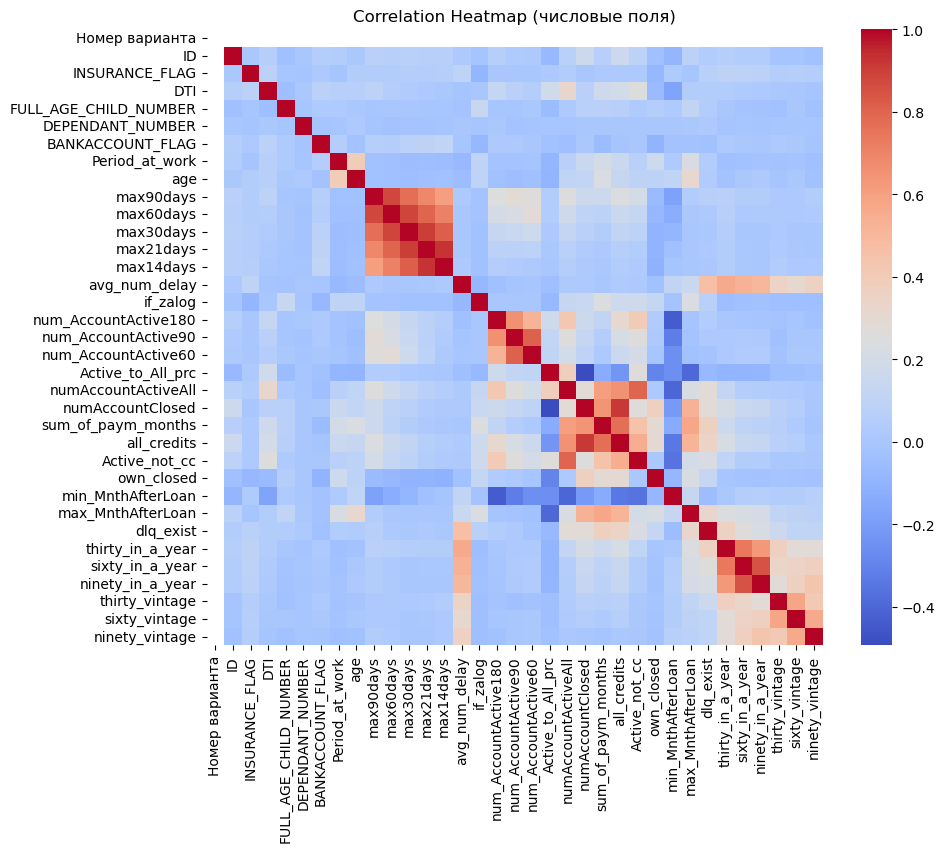

In [6]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap (числовые поля)")
plt.show()

Судя ко корелляционной тепловой карте, есть поля, которые сильно положительно кореллируют. Это max14days, max21days, max30days, max60days, max90days - кол-во запросов в бюро кредитных историй за последние 14 дней. Они могут кореллировать потому что включают друг друга в себя.

То же самое может касаться полей ninety_vintage, sixty_vintage, thirty_vintage; num_AccountActive60, num_AccountActive90, num_AccountActive180; thirty_in_a_year, sixty_in_a_year, ninety_in_a_year; Active_not_cc, numAccountActiveAll.

Отдельно сильная корелляция заметна между all_credits и numAccountClosed - Кол-вом кредитов и кол-вом закрытых счетов; all_credits и sum_of_paym_months - Кол-вом кредитов и суммой платежей за последний месяц; 

### Разделим переменные на качественные и количественные

Для качественных свойственно малое кол-во вариантов. Также будем полагаться на описание полей выше

In [7]:
factor_columns = [
    'ID'
    , 'INCOME_BASE_TYPE'
    , 'CREDIT_PURPOSE'
    , 'SEX'
    , 'EDUCATION'
    , 'EMPL_TYPE'
    , 'EMPL_SIZE'
    , 'EMPL_PROPERTY'
    , 'EMPL_FORM'
    , 'FAMILY_STATUS'
    , 'INSURANCE_FLAG'
    , 'BANKACCOUNT_FLAG'
    , 'if_zalog'
    , 'dlq_exist'
    , 'thirty_in_a_year'
    , 'sixty_in_a_year'
    , 'ninety_in_a_year'
    , 'thirty_vintage'
    , 'sixty_vintage'
    , 'ninety_vintage'
]
df_factor = df.loc[:, factor_columns]
df_factor.shape

(10242, 20)

In [8]:
factor_columns.append('Номер варианта')
factor_columns.remove('ID')
df_numeric = df.loc[:, df.columns.difference(factor_columns)]
df_numeric.shape

(10242, 24)

## Чистим качественные переменные

Сначала посмотрим на распредления каждого из полей

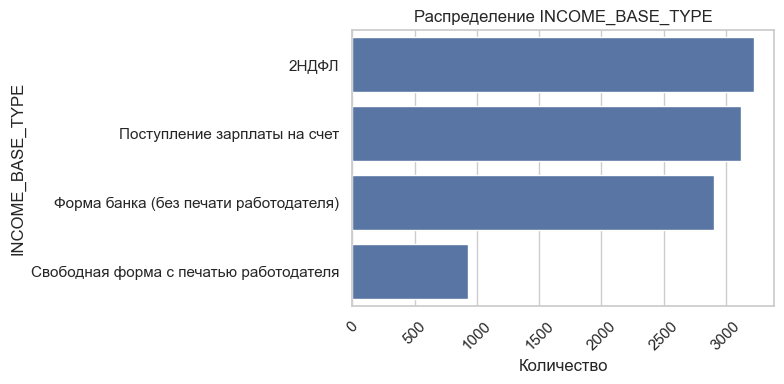

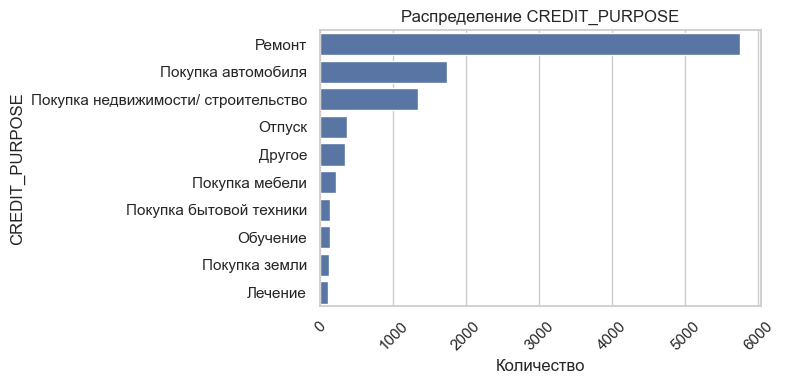

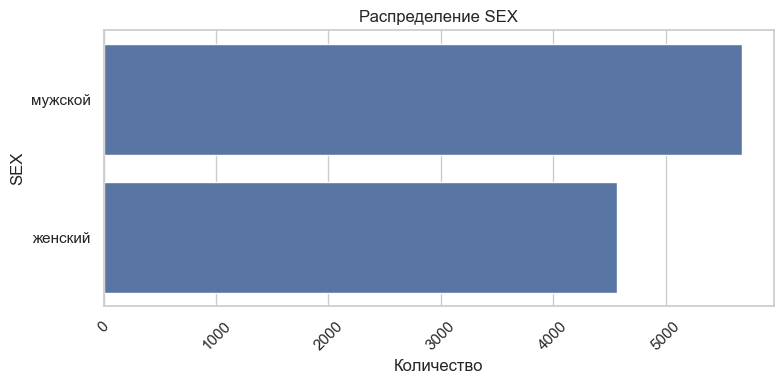

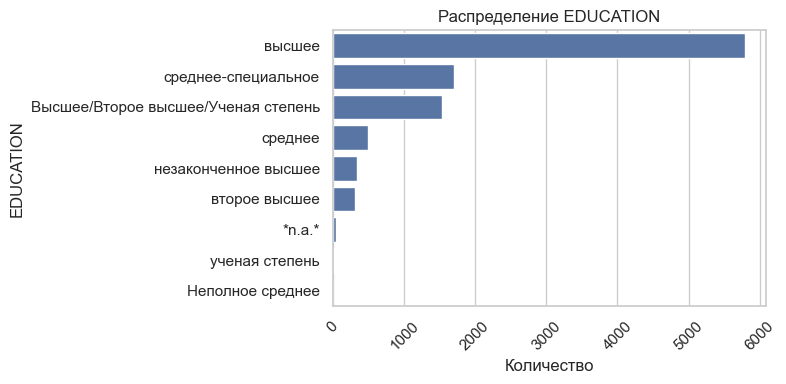

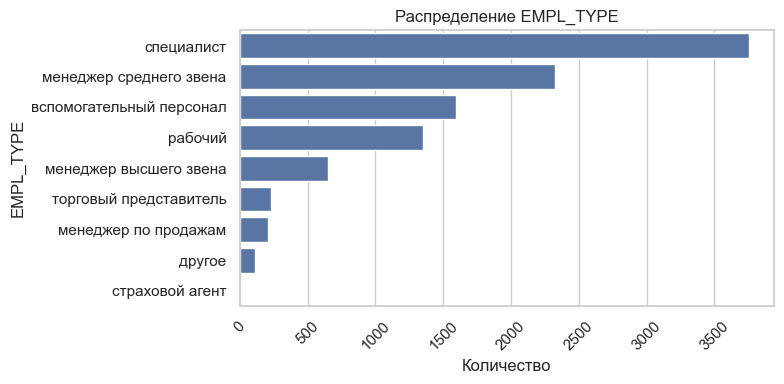

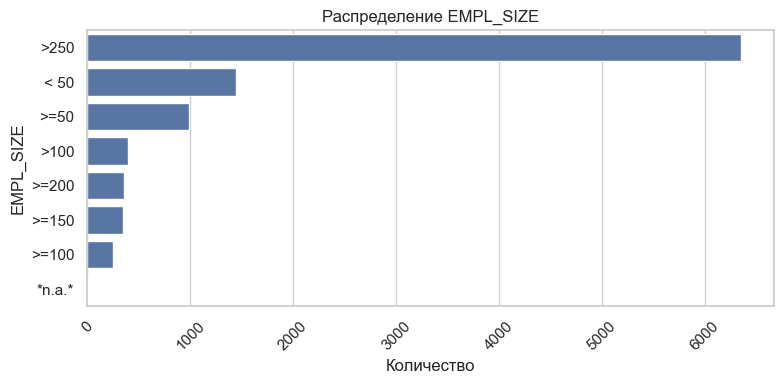

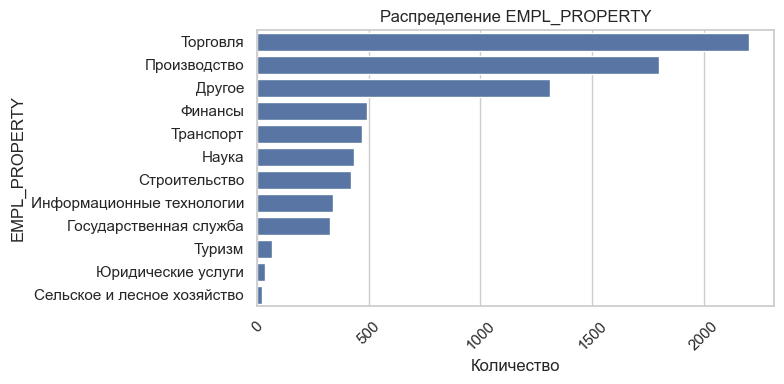

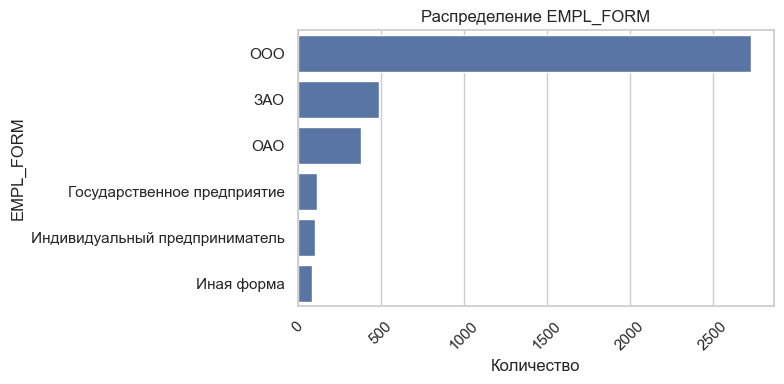

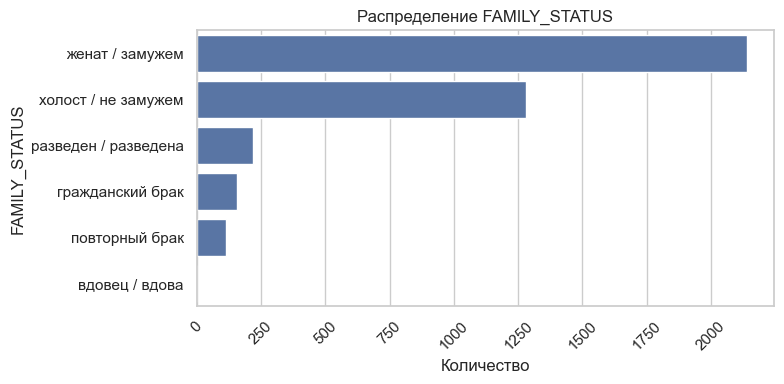

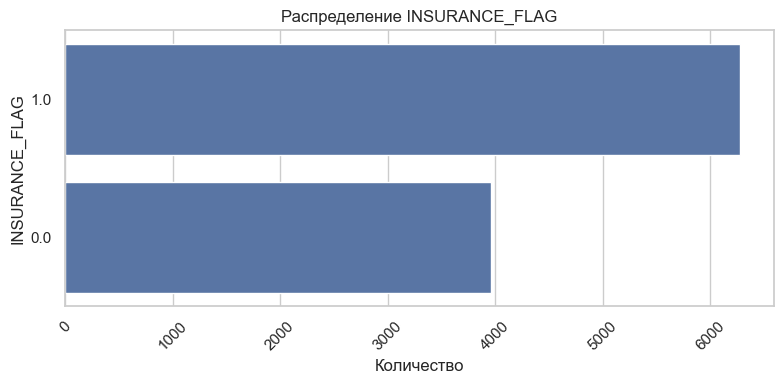

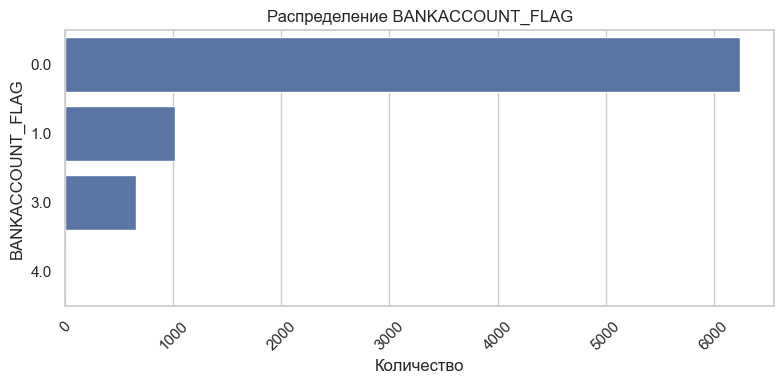

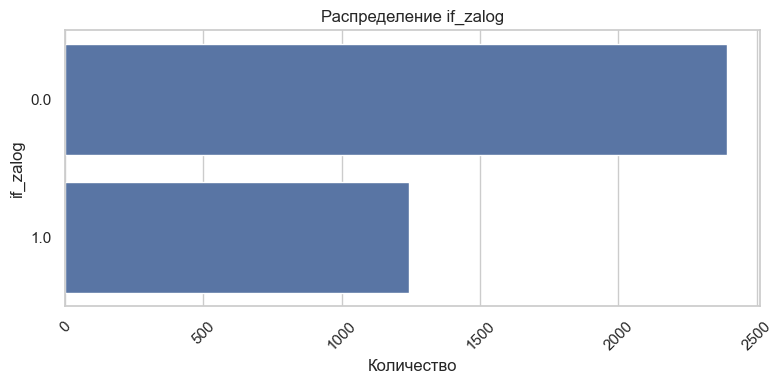

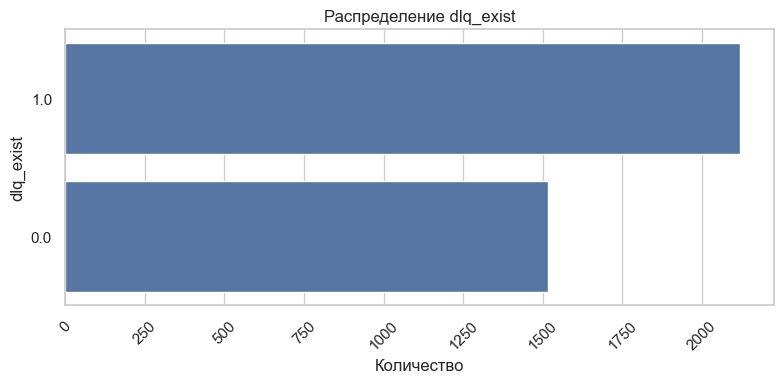

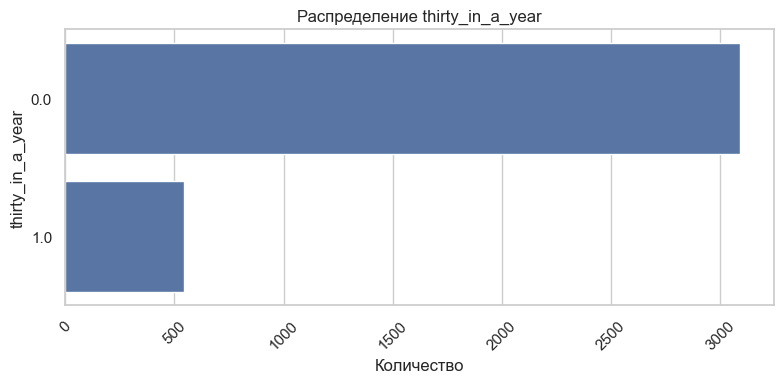

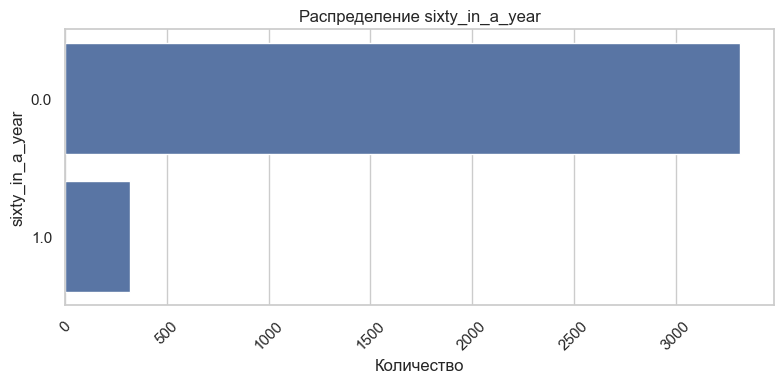

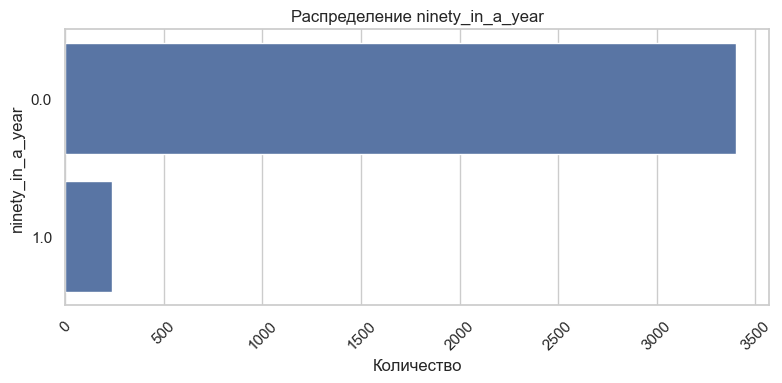

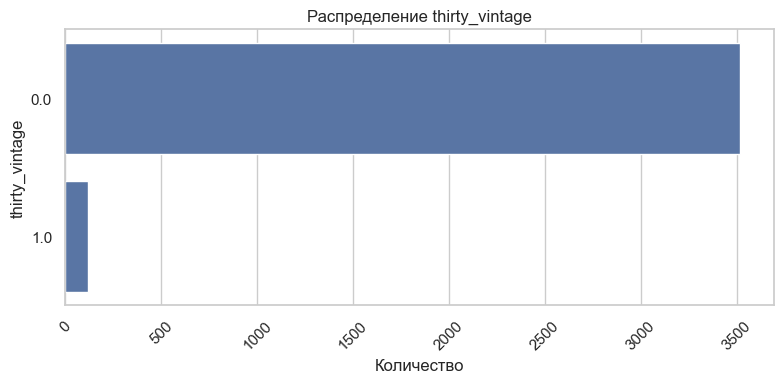

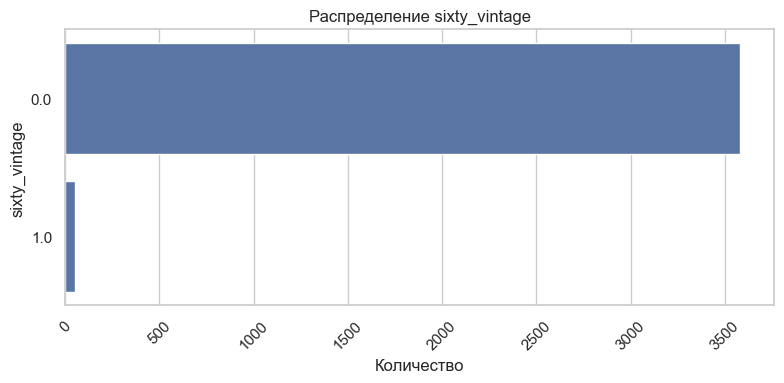

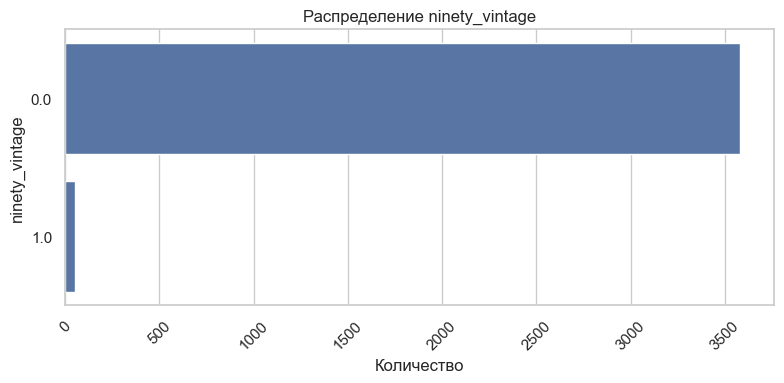

In [9]:
plot_hist_df(df_factor.loc[:, ~df_factor.columns.isin(['ID'])])

### EDUCATION

In [10]:
print(df_factor.iloc[:, 4].unique())

['Высшее/Второе высшее/Ученая степень' 'высшее' 'второе высшее'
 'среднее-специальное' 'среднее' 'незаконченное высшее' '*n.a.*'
 'ученая степень' 'Неполное среднее' nan]


Есть ответ \'Высшее/Второе высшее/Ученая степень\' , объединяющий в себе 3 других категории. Разделить не можем, как и объединить. Держим особенность этой переменной в голове. 

Также есть вариант \'*n.a.\', эквивалентный пропущенному значению. Заменим его на nan и в дальнейшем дропнем

In [11]:
df_factor.iloc[:, 4] = df_factor.iloc[:, 4].replace('*n.a.*', np.nan)

### EMPL_SIZE

In [12]:
df_factor.iloc[:, 6].unique()

array(['>250', '< 50', '>100', '>=150', '>=50', '>=100', '>=200', nan,
       '*n.a.*'], dtype=object)

Вариант '>100' эквивалентен варианту '>=100'. Для единообразия приведём оба варианта к виду '>=100'.

Также есть вариант \'*n.a.\', эквивалентный пропущенному значению. Заменим его на nan и в дальнейшем дропнем.

In [13]:
df_factor.iloc[:, 6] = df_factor.iloc[:, 6].replace('*n.a.*', np.nan)
df_factor.iloc[:, 6] = df_factor.iloc[:, 6].replace('>100', '>=100')

### BANKACCOUNT_FLAG

In [14]:
df_factor['BANKACCOUNT_FLAG'].unique()

array([ 0., nan,  3.,  1.,  4.])

Ответы 3, 4 должны быть в варианте ответа 2, так как по услоию для этой переменной 0 - no online account, 1 - there is one online account, 2 or more - accessed the online account from another device. Поэтому присвоим вариантам 3 и 4 знаечние 2.

In [15]:
df_factor['BANKACCOUNT_FLAG'] = df_factor['BANKACCOUNT_FLAG'].replace(3, 2)
df_factor['BANKACCOUNT_FLAG'] = df_factor['BANKACCOUNT_FLAG'].replace(4, 2)

#### Начиная с INSURANCE_FLAG все дальнейшие факторные поля уже закодированы числами

Для всех качественных полей мы не можем восстановить пропущенные значения, так как это может привести к ошибкам при интерпретации результатов. Дропнем все пропущенные значения для высококореллирующих переменных.

In [16]:
df_factor = df_factor.dropna(subset=['EMPL_FORM'])
print_categorical_summary(df_factor)

=== Categorical variables summary ===
                  unique  missing  missing_%  zeros  zeros_%
ID                  3911        0       0.00      0     0.00
INCOME_BASE_TYPE       4        0       0.00      0     0.00
CREDIT_PURPOSE        10        0       0.00      0     0.00
SEX                    2        0       0.00      0     0.00
EDUCATION              8       16       0.41      0     0.00
EMPL_TYPE              9        0       0.00      0     0.00
EMPL_SIZE              2        4       0.10      0     0.00
EMPL_PROPERTY          5        0       0.00      0     0.00
EMPL_FORM              6        0       0.00      0     0.00
FAMILY_STATUS          6        0       0.00      0     0.00
INSURANCE_FLAG         2        3       0.08   1427    36.49
BANKACCOUNT_FLAG       3        0       0.00   3215    82.20
if_zalog               2      275       7.03   2392    61.16
dlq_exist              2      275       7.03   1516    38.76
thirty_in_a_year       2      275       7.03   

Также дропаем пропущенные по бинарным переменным

In [17]:
df_factor = df_factor.dropna(subset=['if_zalog'])
print_categorical_summary(df_factor)

=== Categorical variables summary ===
                  unique  missing  missing_%  zeros  zeros_%
ID                  3636        0       0.00      0     0.00
INCOME_BASE_TYPE       4        0       0.00      0     0.00
CREDIT_PURPOSE        10        0       0.00      0     0.00
SEX                    2        0       0.00      0     0.00
EDUCATION              8       16       0.44      0     0.00
EMPL_TYPE              9        0       0.00      0     0.00
EMPL_SIZE              2        4       0.11      0     0.00
EMPL_PROPERTY          5        0       0.00      0     0.00
EMPL_FORM              6        0       0.00      0     0.00
FAMILY_STATUS          6        0       0.00      0     0.00
INSURANCE_FLAG         2        3       0.08   1340    36.85
BANKACCOUNT_FLAG       3        0       0.00   2990    82.23
if_zalog               2        0       0.00   2392    65.79
dlq_exist              2        0       0.00   1516    41.69
thirty_in_a_year       2        0       0.00   

Оставшиеся заменим модой по соответствующему полю, поскольку их немного

In [18]:
for col in df_factor.columns:
    if df_factor[col].isna().any():
        mode_value = df_factor[col].mode(dropna=True)[0]
        df_factor[col] = df_factor[col].fillna(mode_value)

print_categorical_summary(df_factor)

=== Categorical variables summary ===
                  unique  missing  missing_%  zeros  zeros_%
ID                  3636        0        0.0      0     0.00
INCOME_BASE_TYPE       4        0        0.0      0     0.00
CREDIT_PURPOSE        10        0        0.0      0     0.00
SEX                    2        0        0.0      0     0.00
EDUCATION              8        0        0.0      0     0.00
EMPL_TYPE              9        0        0.0      0     0.00
EMPL_SIZE              2        0        0.0      0     0.00
EMPL_PROPERTY          5        0        0.0      0     0.00
EMPL_FORM              6        0        0.0      0     0.00
FAMILY_STATUS          6        0        0.0      0     0.00
INSURANCE_FLAG         2        0        0.0   1340    36.85
BANKACCOUNT_FLAG       3        0        0.0   2990    82.23
if_zalog               2        0        0.0   2392    65.79
dlq_exist              2        0        0.0   1516    41.69
thirty_in_a_year       2        0        0.0   

Осталось 3636 значений

Важно заметить, что в данном случае нули - корректные значения. В данном случае они встречаются в бинарных полях. Позднее, когда мы применим one-hot encoding, нули будут естественны для всех качественных переменных

Теперь мы получили очищенные качественные переменные, перейдем к подготовке и чистке количественных

## Чистим количественные переменные

Посмотрим на изначальные данные

In [19]:
print_numeric_summary(df_numeric.loc[:, ~df_numeric.columns.isin(['ID'])])

=== Numeric variables summary ===
                       missing  missing_%  zeros  zeros_%       mean     median        std    min         max
Active_not_cc             6606      64.50   1226    11.97   1.086634   1.000000   1.089870   0.00    8.000000
Active_to_All_prc         6606      64.50    473     4.62   0.427423   0.400000   0.293485   0.00    1.000000
DEPENDANT_NUMBER             0       0.00  10204    99.63   0.005663   0.000000   0.129473   0.00   10.000000
DTI                        118       1.15      0     0.00   0.385697   0.400000   0.136677   0.02    0.590000
FULL_AGE_CHILD_NUMBER        0       0.00   6110    59.66   0.553993   0.000000   0.780126   0.00   14.000000
Period_at_work            2327      22.72      0     0.00  66.267214  45.000000  65.842573   5.00  468.000000
age                       2327      22.72      0     0.00  36.289577  35.000000   8.690028  23.00   63.000000
all_credits               6606      64.50      0     0.00   5.728548   5.000000   4.06

Сджоиним по айди и выкинем значения, которые мы бы в любом случае потеряли. Теперь посмотрим на значения по предочищенным данным

In [20]:
df_numeric = df_numeric.merge(df_factor[['ID']], on='ID', how='inner')
print_numeric_summary(df_numeric)

=== Numeric variables summary ===
                       missing  missing_%  zeros  zeros_%          mean        median           std         min           max
Active_not_cc                0       0.00   1226    33.72  1.086634e+00  1.000000e+00      1.089870        0.00  8.000000e+00
Active_to_All_prc            0       0.00    473    13.01  4.274234e-01  4.000000e-01      0.293485        0.00  1.000000e+00
DEPENDANT_NUMBER             0       0.00   3624    99.67  4.675468e-03  0.000000e+00      0.089197        0.00  3.000000e+00
DTI                          3       0.08      0     0.00  3.908175e-01  4.100000e-01      0.136707        0.02  5.900000e-01
FULL_AGE_CHILD_NUMBER        0       0.00   2206    60.67  5.335534e-01  0.000000e+00      0.763851        0.00  6.000000e+00
ID                           0       0.00      0     0.00  1.097197e+06  1.092066e+06  59890.821857  1000036.00  1.204836e+06
Period_at_work               0       0.00      0     0.00  5.757261e+01  4.100000e+0

Стоит обратить внимание на то, что несмотря на большое кол-во нулей в переменных 

- DEPENDANT_NUMBER - Кол-во иждивенцев, 
- FULL_AGE_CHILD_NUMBERС - Кол-во лет ребенку, 
- max14days - кол-во запросов в бюро кредитных историй за последние 14 дней, 
- max21days - кол-во запросов в бюро кредитных историй за последние 21 дней, 
- max30days - кол-во запросов в бюро кредитных историй за последние 30 дней, 
- num_AccountActive60 - кол-во активных счетов счетов за последние 60 дней, 
- num_AccountActive90 - кол-во активных счетов счетов за последние 90 дней, 
- num_AccountActive180 - кол-во активных счетов счетов за последние 180 дней, 
- own_closed - Кол-во закрытых кредитов

Эти нули обладают значимостью для каждой из переменных.

Посмотрим на распределение переменных



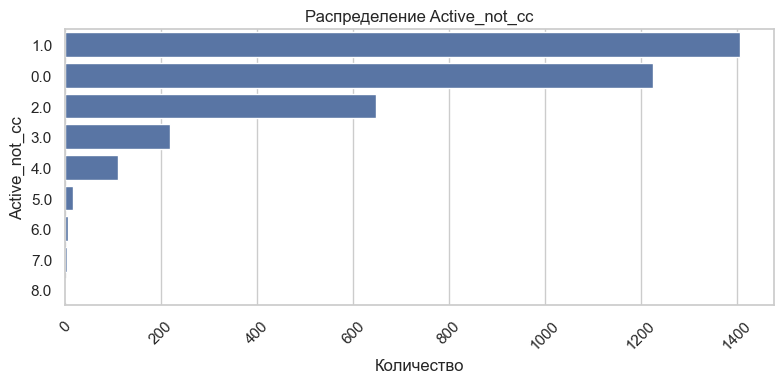

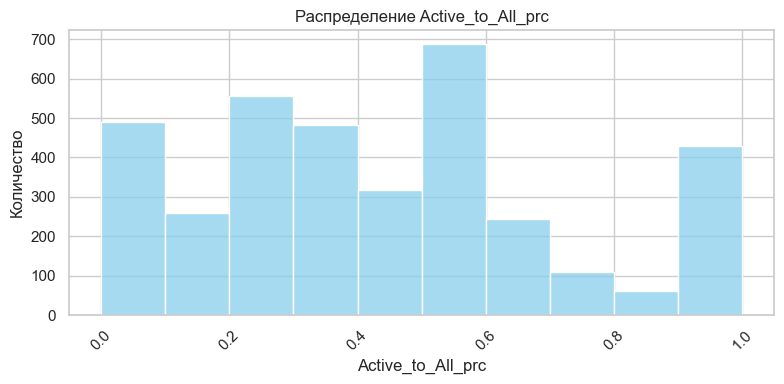

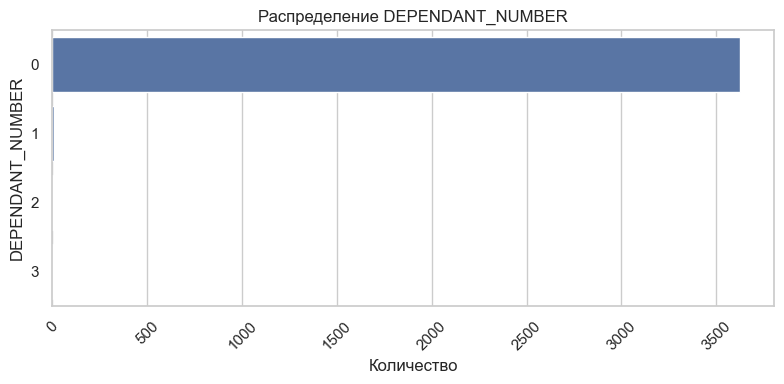

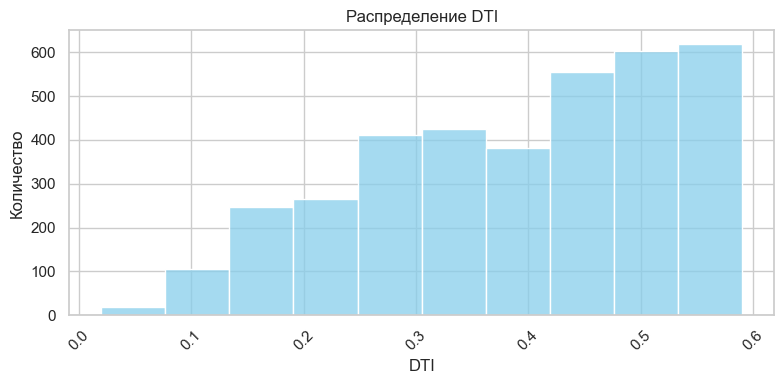

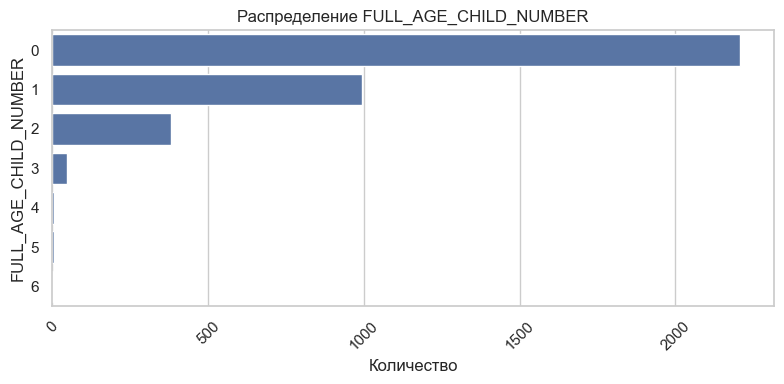

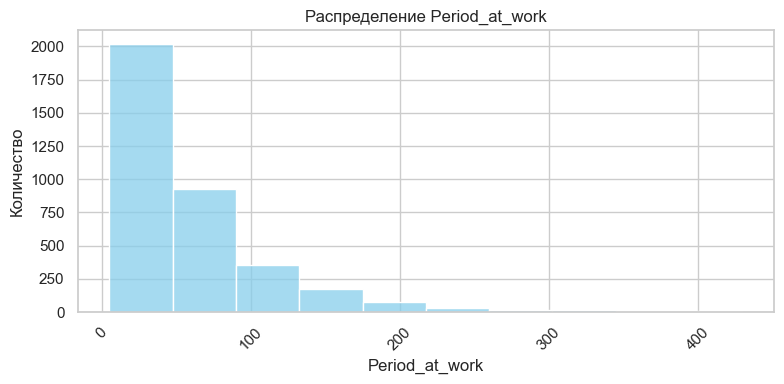

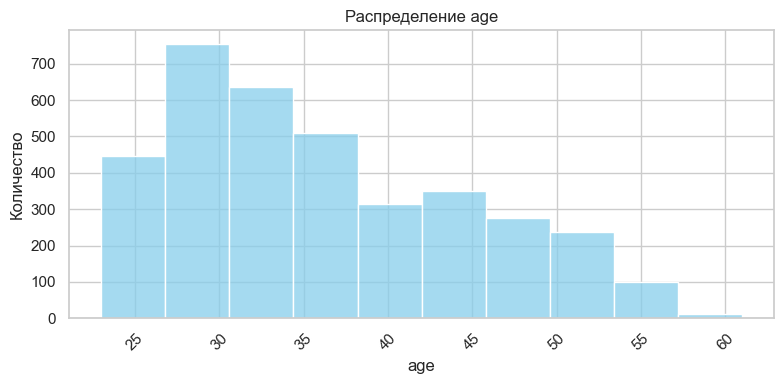

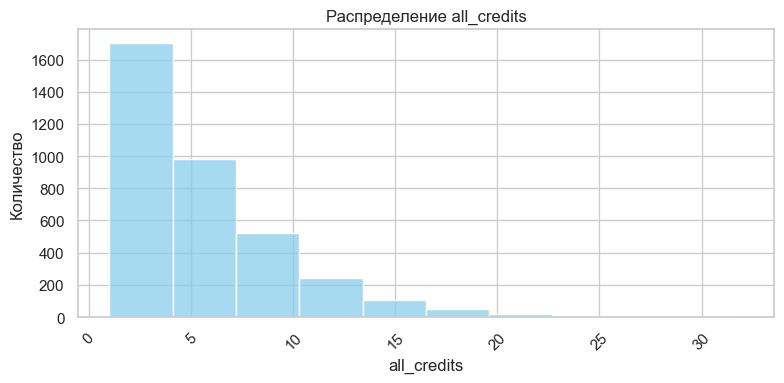

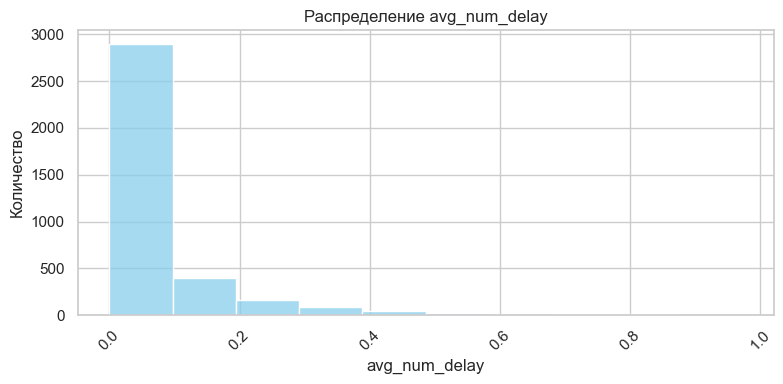

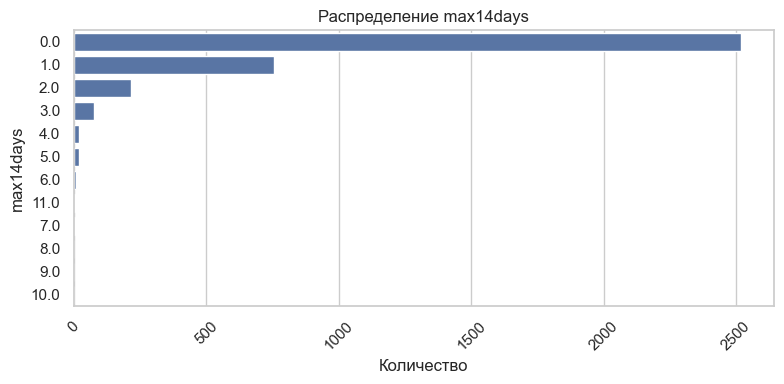

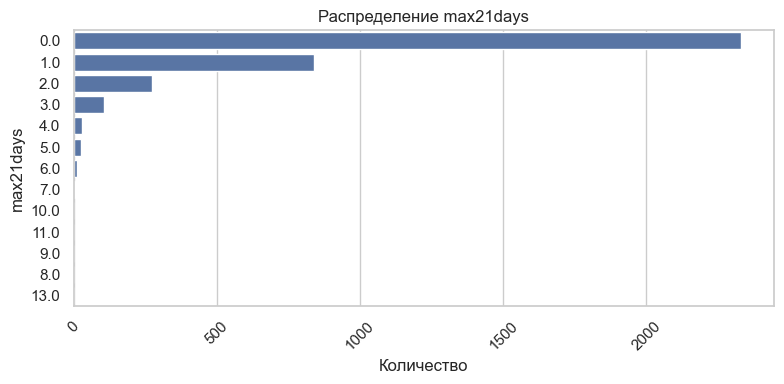

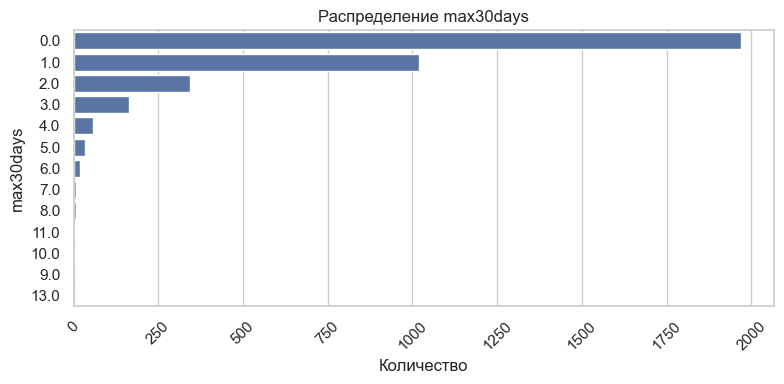

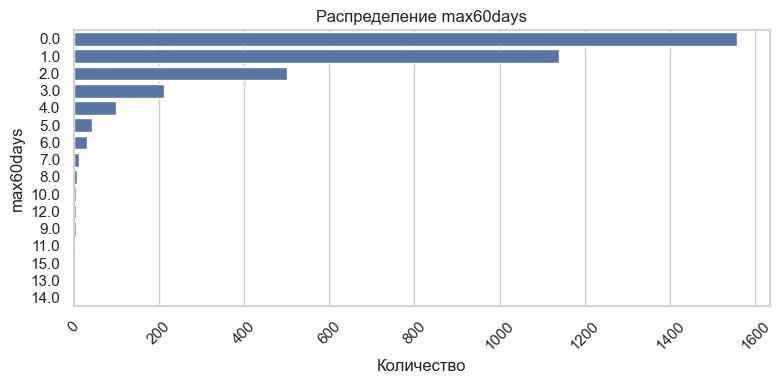

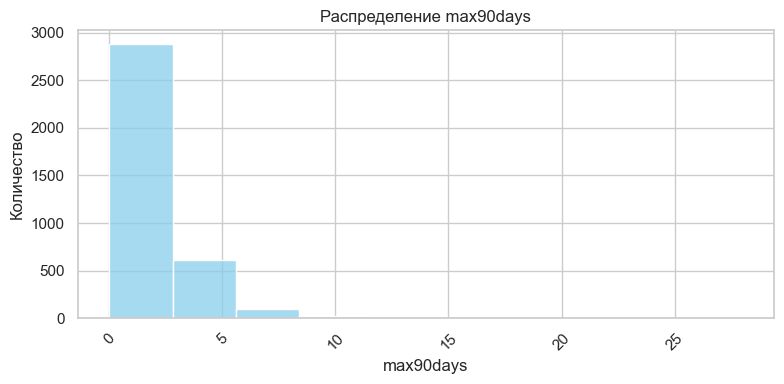

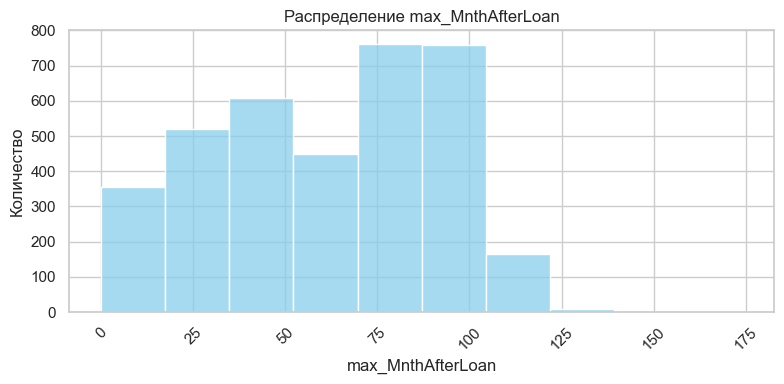

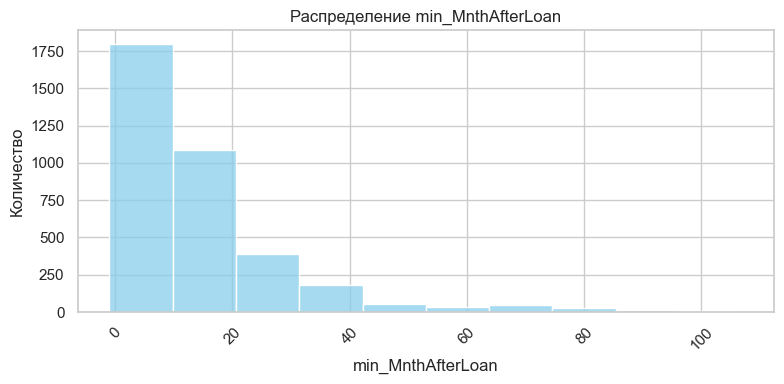

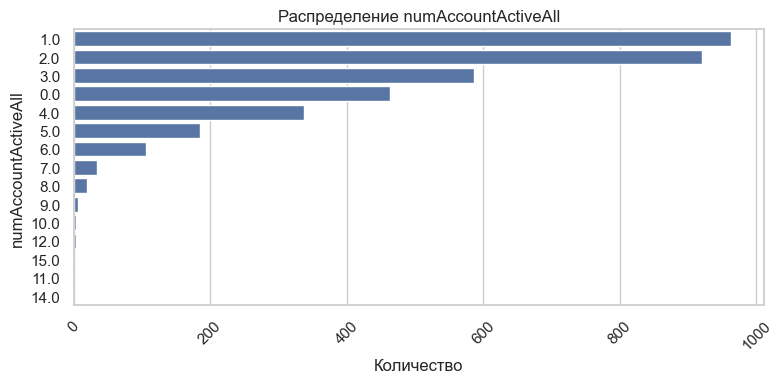

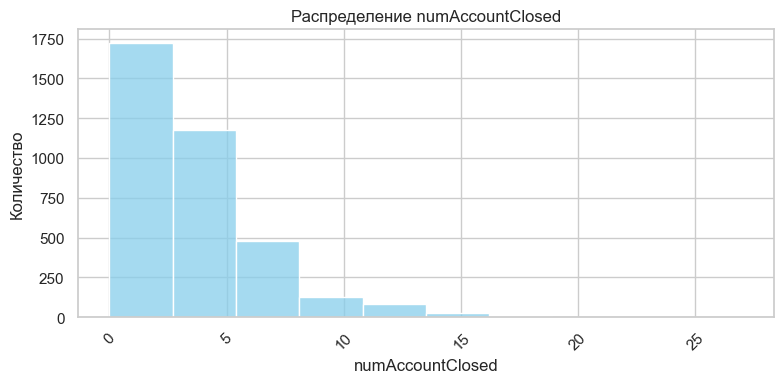

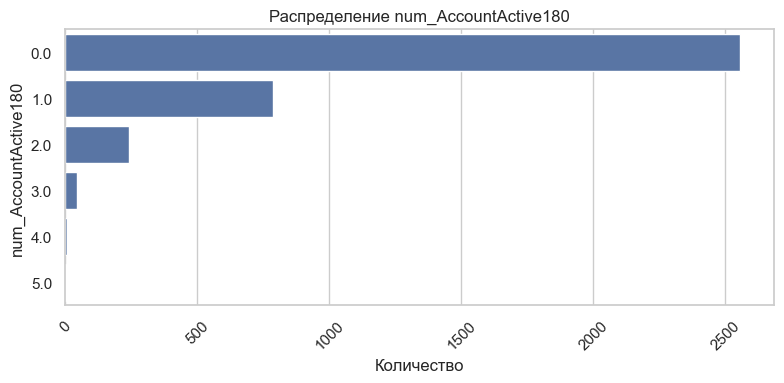

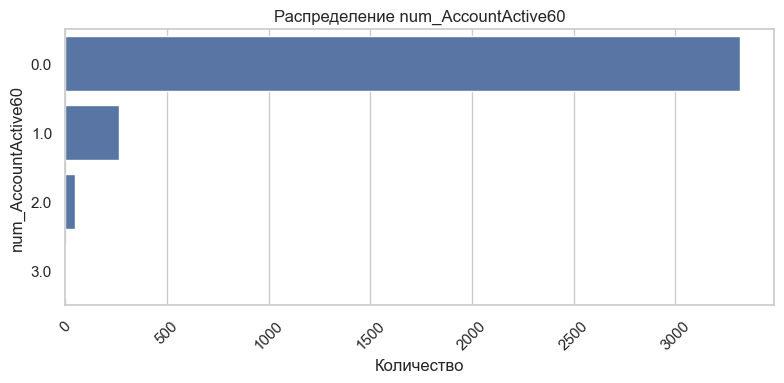

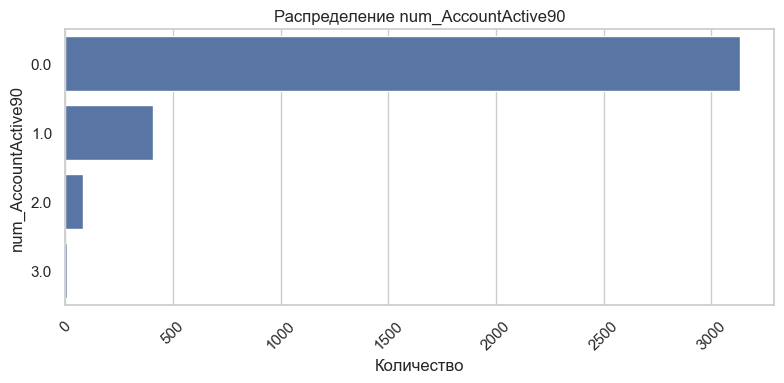

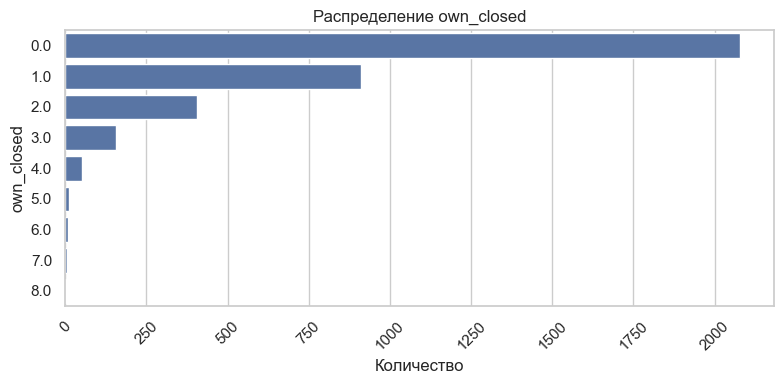

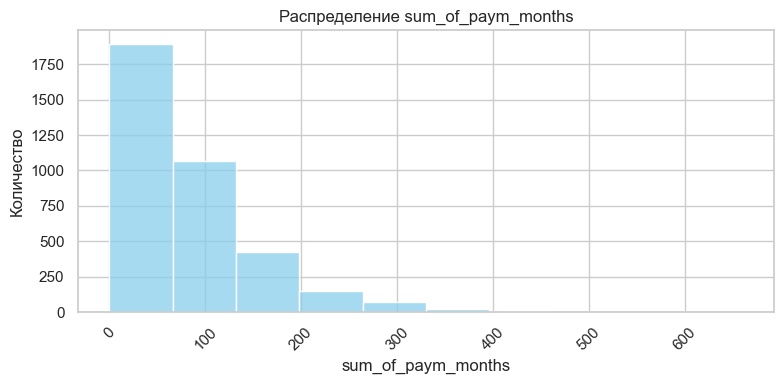

In [21]:
plot_hist_df(df_numeric.loc[:, ~df_numeric.columns.isin(['ID'])])

Для переменных max14days, max21days, max30days, max60days, max90days заметили нецелые значения, что нехарактерно для полей кол-во запросов в бюро кредитных историй за последние n дней. Такие данные некорректны.  подлежат удалению.

In [22]:
for col in ['max14days', 'max21days', 'max30days', 'max60days', 'max90days']:
    df_numeric = df_numeric[df_numeric[col] % 1 == 0]

Некорректным является значения -1 для min_MnthAfterLoan - минимальное кол-во месяцев, которое прошло с момета взятия прошлого кредита, то есть как давно выдали последний кредит клиенту. Посмтотрим на них отдельно. 

In [23]:
df_numeric[df_numeric['min_MnthAfterLoan'] < 0]

,Active_not_cc,Active_to_All_prc,DEPENDANT_NUMBER,DTI,FULL_AGE_CHILD_NUMBER,ID,Period_at_work,age,all_credits,avg_num_delay,max14days,max21days,max30days,max60days,max90days,max_MnthAfterLoan,min_MnthAfterLoan,numAccountActiveAll,numAccountClosed,num_AccountActive180,num_AccountActive60,num_AccountActive90,own_closed,sum_of_paym_months
1126,1.0,0.272727,0,0.27,0,1055696,146.0,40.0,11.0,0.0,0.0,1.0,2.0,2.0,3.0,101.0,-1.0,3.0,8.0,2.0,2.0,2.0,0.0,157.0
1322,2.0,0.285714,0,0.36,0,1066116,214.0,48.0,7.0,0.0,0.0,2.0,3.0,3.0,3.0,100.0,-1.0,2.0,5.0,2.0,1.0,1.0,3.0,163.0
1454,2.0,0.600000,0,0.15,0,1072036,6.0,27.0,5.0,0.0,0.0,4.0,4.0,6.0,6.0,53.0,-1.0,4.0,1.0,2.0,2.0,2.0,0.0,81.0
1500,3.0,0.625000,0,0.26,0,1073856,12.0,40.0,8.0,0.0,0.0,2.0,2.0,2.0,2.0,43.0,-1.0,5.0,3.0,2.0,2.0,2.0,0.0,84.0
1596,2.0,1.000000,0,0.47,1,1078836,77.0,27.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,12.0,-1.0,2.0,0.0,1.0,1.0,1.0,0.0,15.0
2800,2.0,0.454545,0,0.49,0,1155716,16.0,29.0,11.0,0.0,0.0,1.0,1.0,1.0,1.0,97.0,-1.0,5.0,6.0,2.0,1.0,2.0,1.0,109.0
3287,2.0,0.400000,0,0.36,0,1183376,51.0,25.0,5.0,0.0,0.0,2.0,2.0,2.0,4.0,44.0,-1.0,2.0,3.0,1.0,1.0,1.0,2.0,88.0


В каждом из данных вариантов поле min_MnthAfterLoan указано как '-1', что говорит о некорректном значении. Удалим эти записи, так как не можем однозначно их интерпретировать.

In [24]:
df_numeric = df_numeric[df_numeric['min_MnthAfterLoan'] >= 0]

Пропущенных значений получили очень мало, поэтому заменим их на среднее.

In [25]:
numeric_cols = df_numeric.loc[:, ~df_numeric.columns.isin(['ID'])].columns
df_numeric[numeric_cols] = df_numeric[numeric_cols].fillna(df_numeric[numeric_cols].mean())
print_numeric_summary(df_numeric)

=== Numeric variables summary ===
                       missing  missing_%  zeros  zeros_%          mean        median           std         min           max
Active_not_cc                0        0.0   1223    33.74  1.085793e+00  1.000000e+00      1.090082        0.00  8.000000e+00
Active_to_All_prc            0        0.0    471    12.99  4.273031e-01  4.000000e-01      0.293394        0.00  1.000000e+00
DEPENDANT_NUMBER             0        0.0   3613    99.67  4.689655e-03  0.000000e+00      0.089332        0.00  3.000000e+00
DTI                          0        0.0      0     0.00  3.909249e-01  4.100000e-01      0.136719        0.02  5.900000e-01
FULL_AGE_CHILD_NUMBER        0        0.0   2197    60.61  5.340690e-01  0.000000e+00      0.763409        0.00  6.000000e+00
ID                           0        0.0      0     0.00  1.097229e+06  1.092096e+06  59926.026598  1000036.00  1.204836e+06
Period_at_work               0        0.0      0     0.00  5.754400e+01  4.100000e+0

Теперь можем объединить данные по категориальным и по качественным переменным

In [26]:
df_final = df_numeric.merge(df_factor, on='ID', how='inner')

Для поля EDUCATION вручную зададим перевод строк в числа - категории. В дальнеейшем при кластеризации это разделение будет создавать осмысленное расстояние между показателями. Для других же категориальных переменных нельзя собрать упорядоченный набор значений, так как они разные. Их заккодируем с помощью One Hot Encoding.

In [27]:
df_final['EDUCATION'] = df_final['EDUCATION'].replace('Неполное среднее', 1)
df_final['EDUCATION'] = df_final['EDUCATION'].replace('среднее', 2)
df_final['EDUCATION'] = df_final['EDUCATION'].replace('среднее-специальное' , 3)
df_final['EDUCATION'] = df_final['EDUCATION'].replace('незаконченное высшее', 4)
df_final['EDUCATION'] = df_final['EDUCATION'].replace('высшее', 5)
df_final['EDUCATION'] = df_final['EDUCATION'].replace('ученая степень', 6)
df_final['EDUCATION'] = df_final['EDUCATION'].replace('второе высшее', 7)
df_final['EDUCATION'] = df_final['EDUCATION'].replace('Высшее/Второе высшее/Ученая степень', 6) # как среднее между высшим, вторым высшим и ученой степенью

/var/folders/sz/_qcb1_451nnbbyc07knl7tc40000gq/T/ipykernel_19959/2884349358.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['EDUCATION'] = df_final['EDUCATION'].replace('Высшее/Второе высшее/Ученая степень', 6) # как среднее между высшим, вторым высшим и ученой степенью


Незакодированными среди категориальных у нас остаются переменные. Было бы неверно поступить с ними также, как с EDUCATION, так как их нельзя упорядочить
- INCOME_BASE_TYPE
- CREDIT_PURPOSE
- SEX
- EMPL_TYPE
- EMPL_SIZE
- EMPL_PROPERTY
- EMPL_FORM
- FAMILY_STATUS
- BANKACCOUNT_FLAG

In [28]:
columns_to_encode = [
    'INCOME_BASE_TYPE'
    , 'CREDIT_PURPOSE'
    , 'SEX'
    , 'EMPL_TYPE'
    , 'EMPL_SIZE'
    , 'EMPL_PROPERTY'
    , 'EMPL_FORM'
    , 'FAMILY_STATUS'
    , 'BANKACCOUNT_FLAG'
]
# One-hot encoding
df_encoded = pd.get_dummies(df_final, columns=columns_to_encode)
print_general_summary(df_encoded)

=== General Dataframe summary ===
                                    unique  missing_%  zeros_%
Active_not_cc                            9        0.0    33.74
Active_to_All_prc                       95        0.0    12.99
DEPENDANT_NUMBER                         4        0.0    99.67
DTI                                     58        0.0     0.00
FULL_AGE_CHILD_NUMBER                    7        0.0    60.61
...                                    ...        ...      ...
FAMILY_STATUS_разведен / разведена       2        0.0    94.37
FAMILY_STATUS_холост / не замужем        2        0.0    67.64
BANKACCOUNT_FLAG_0.0                     2        0.0    17.79
BANKACCOUNT_FLAG_1.0                     2        0.0    87.92
BANKACCOUNT_FLAG_2.0                     2        0.0    94.29

[81 rows x 3 columns]

DataFrame shape: (3625, 81)


В итоговом датасете получилась 81 переменная и 3625 записей. В датасете нет пропущенных значений, а все нули имеют смысловую ценность.

Посмотрим на итоговое распределение переменных и опишем классического представителя нашей выборки.

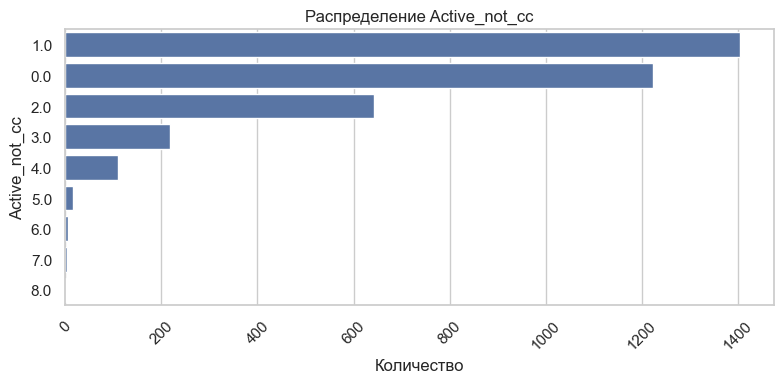

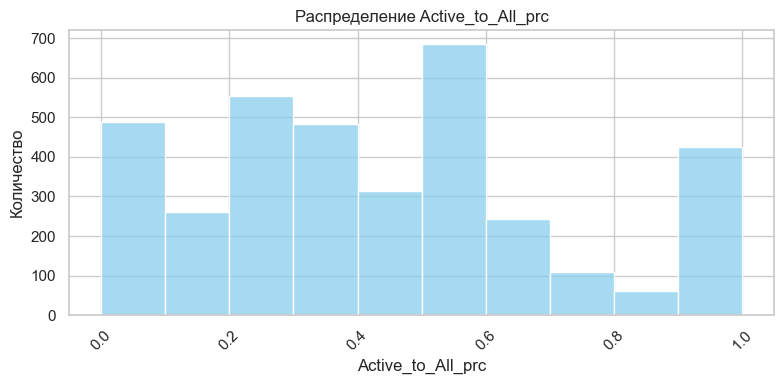

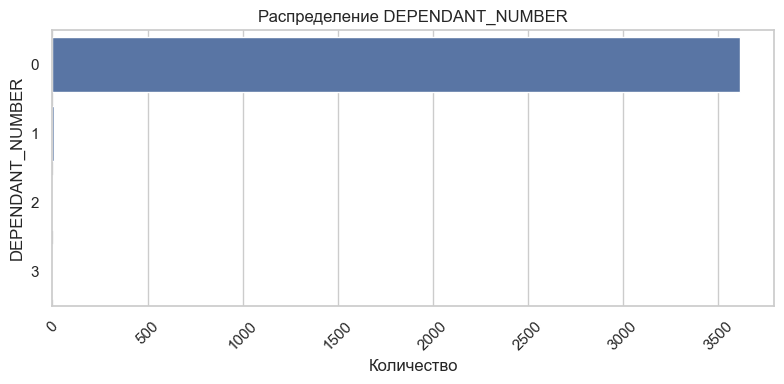

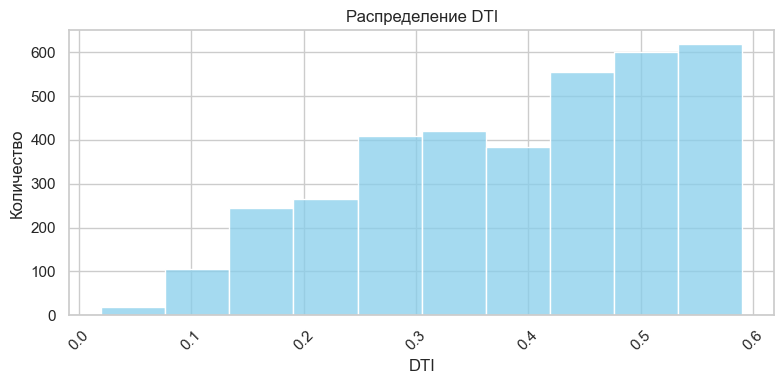

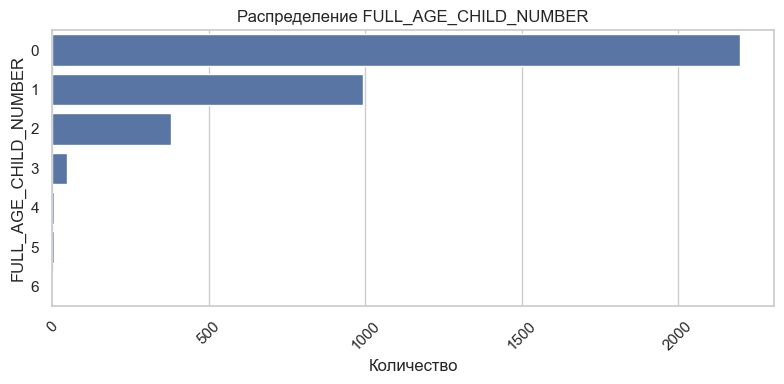

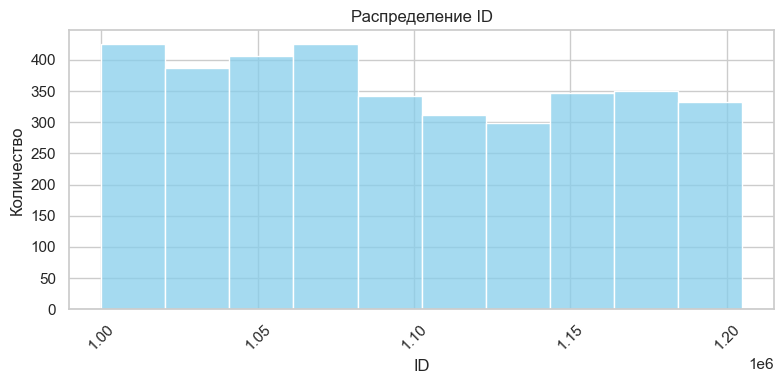

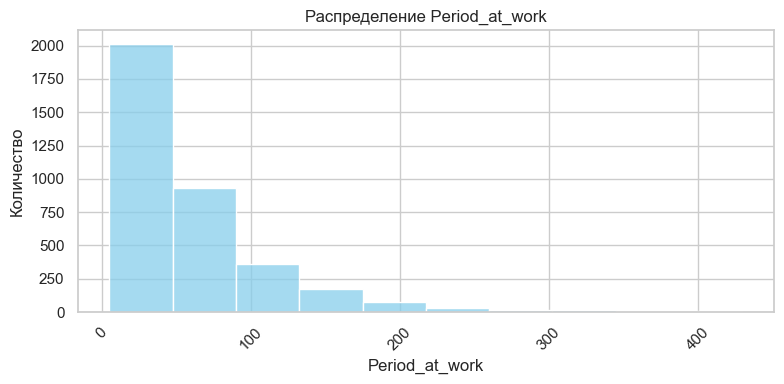

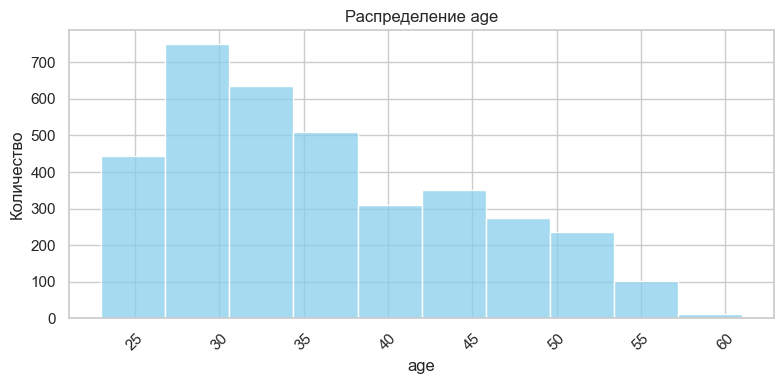

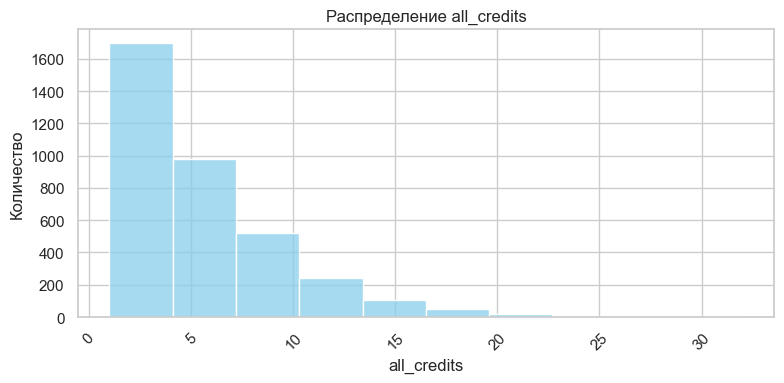

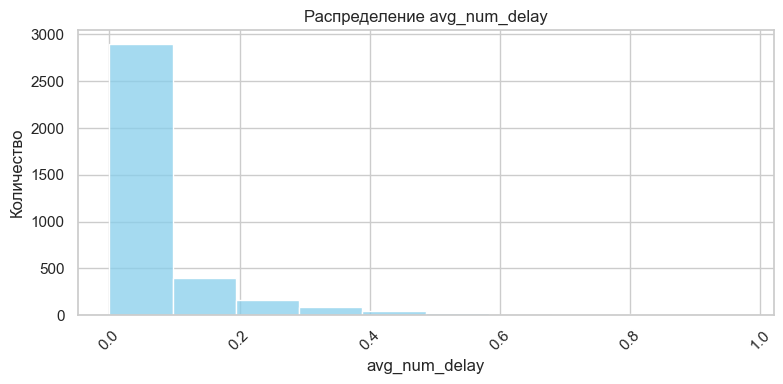

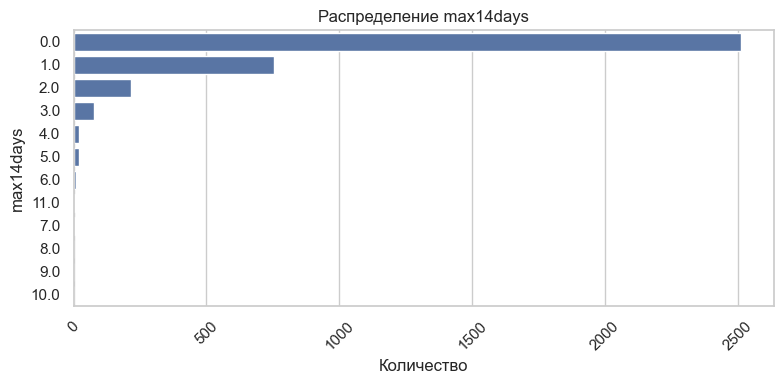

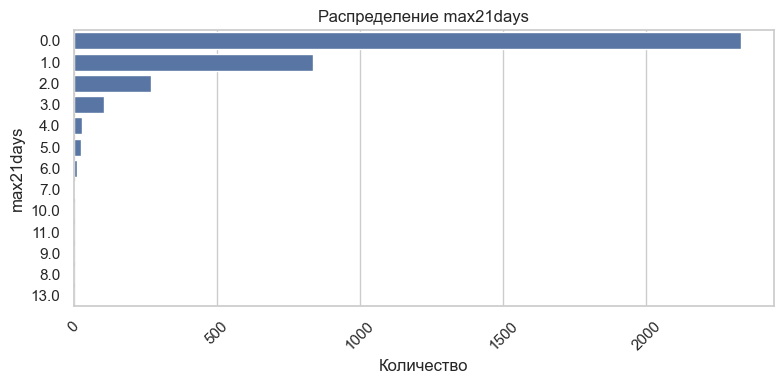

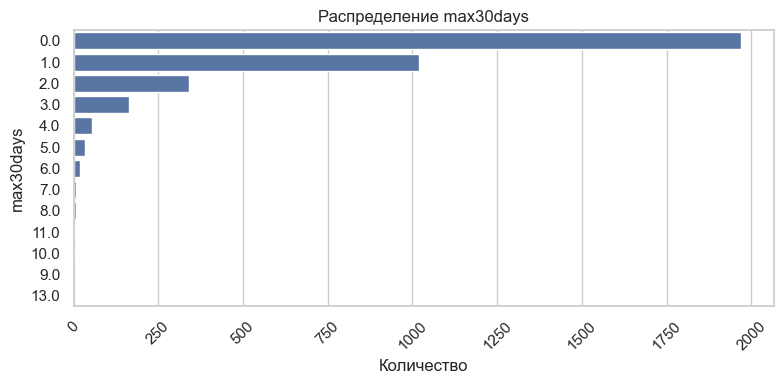

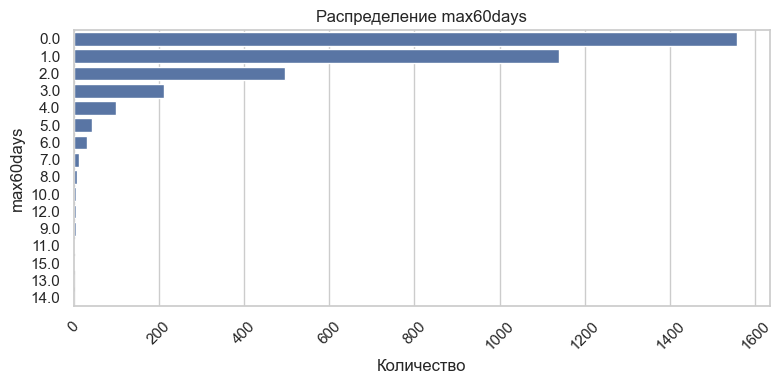

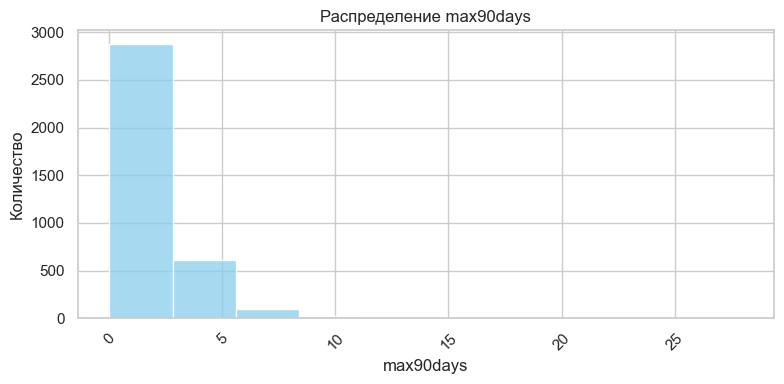

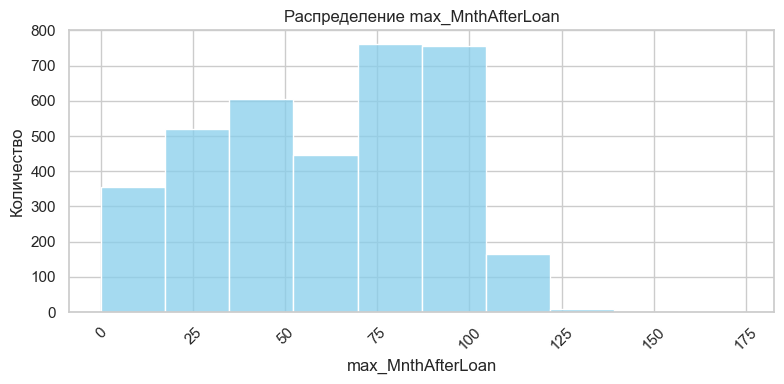

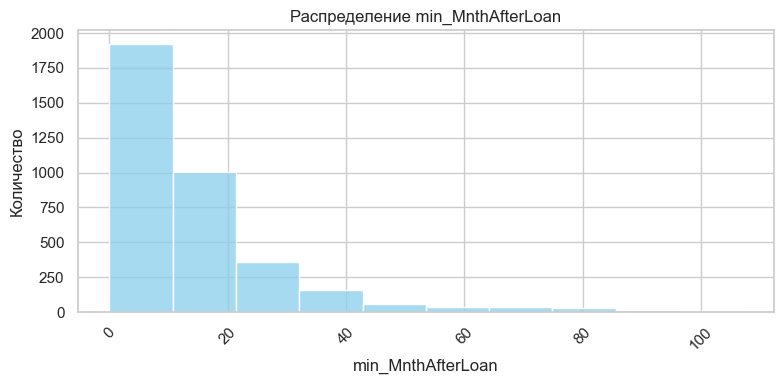

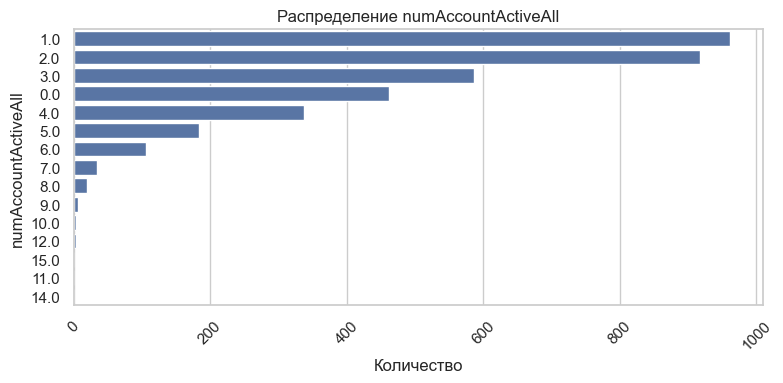

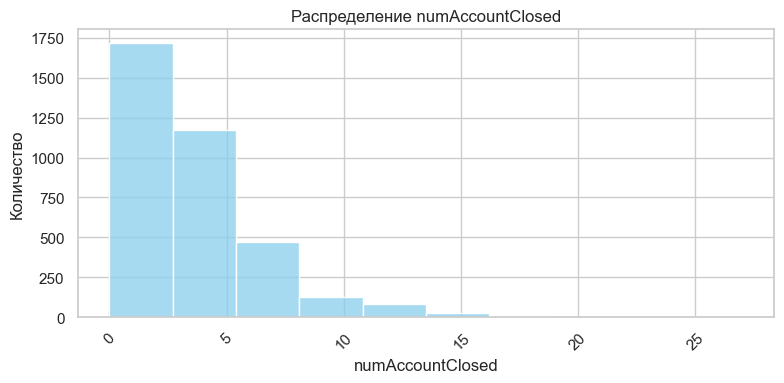

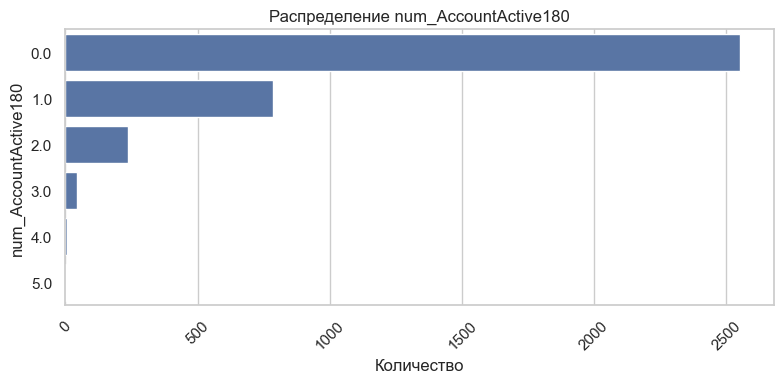

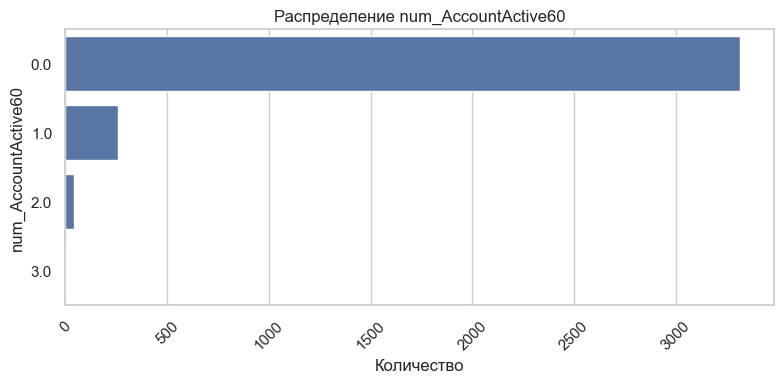

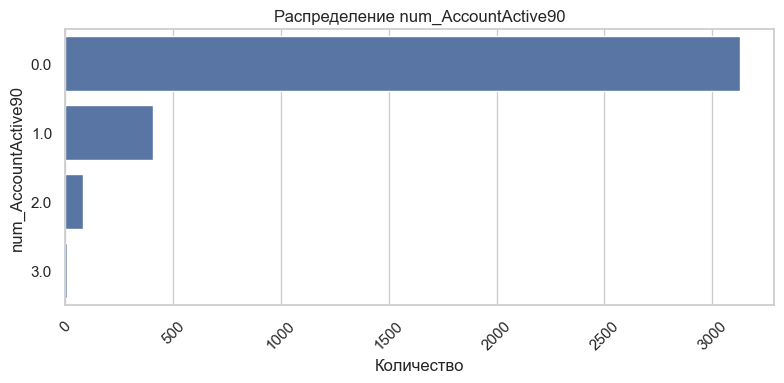

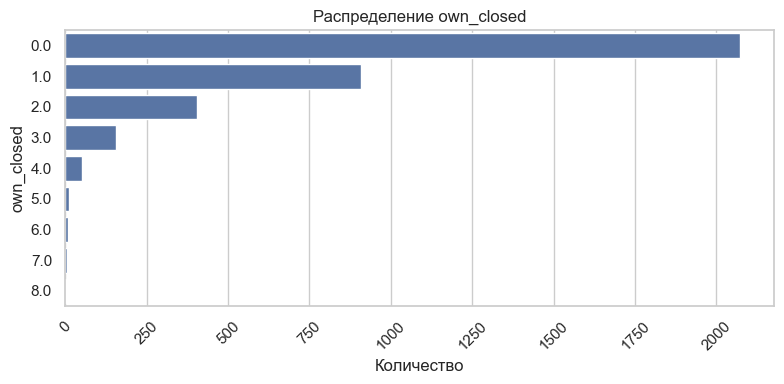

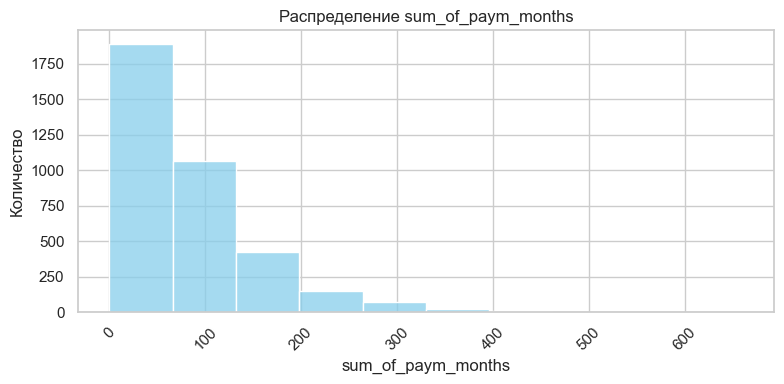

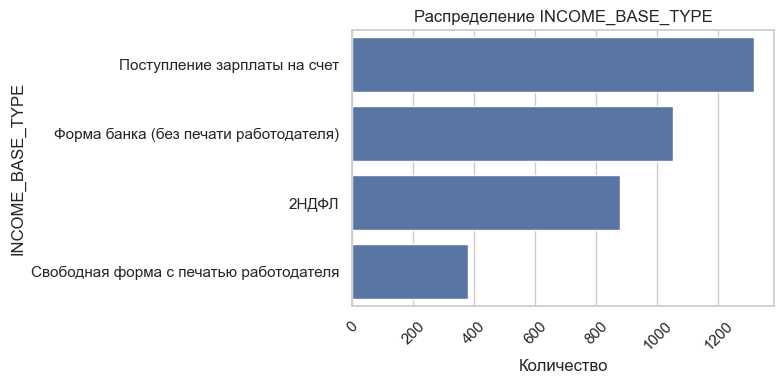

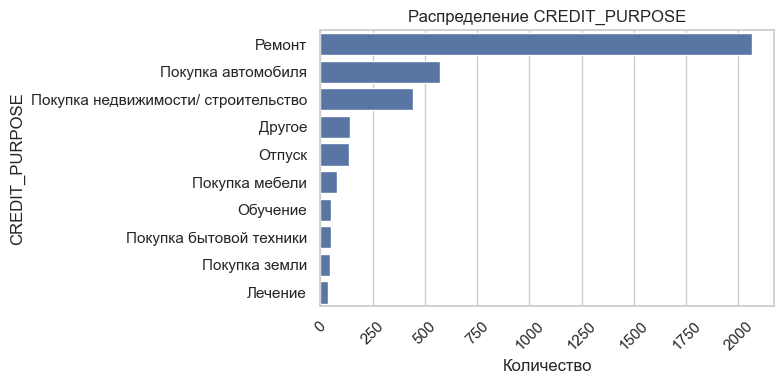

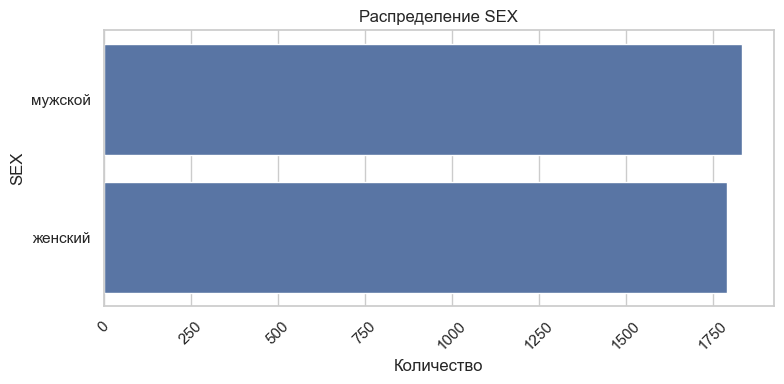

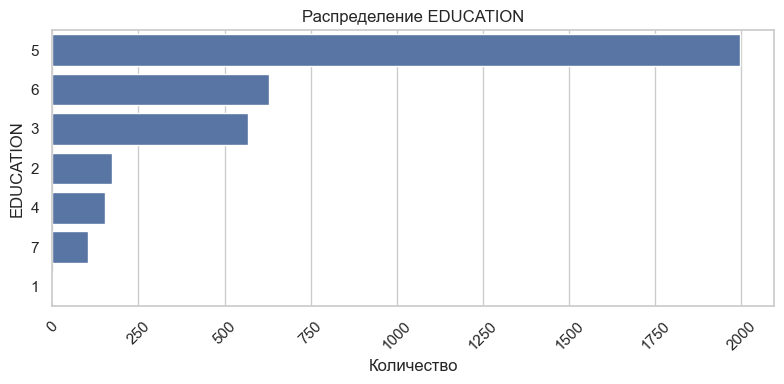

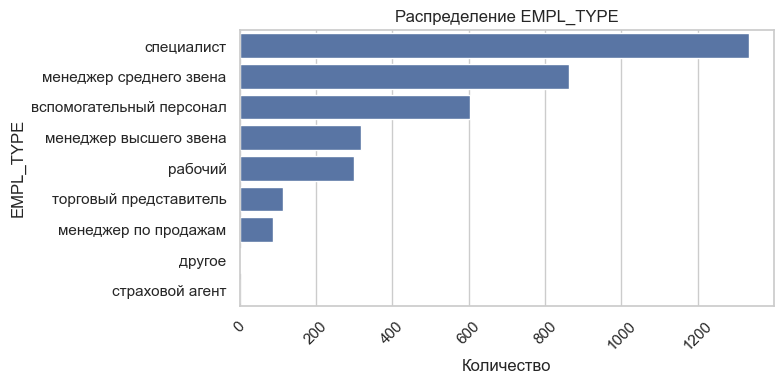

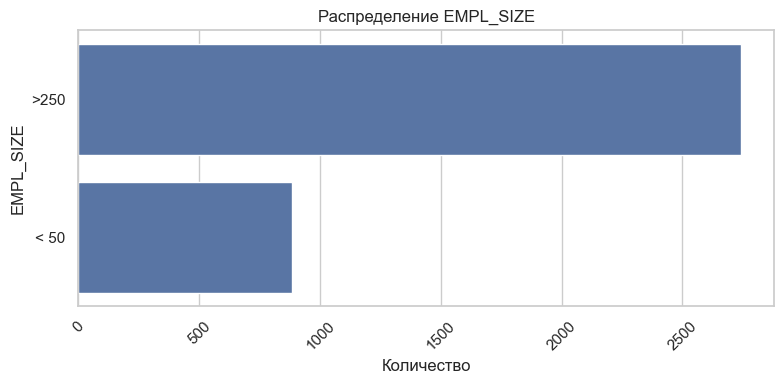

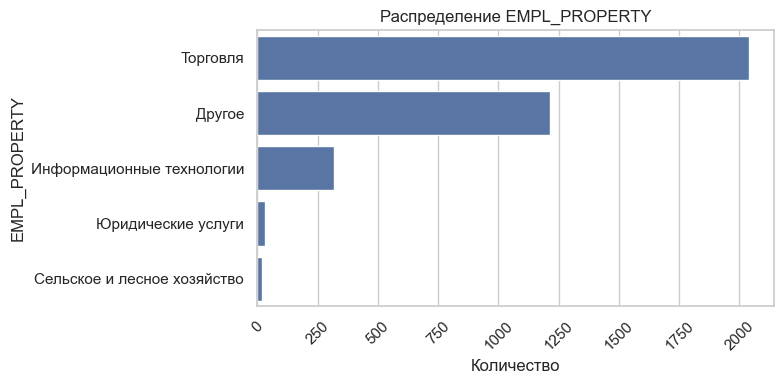

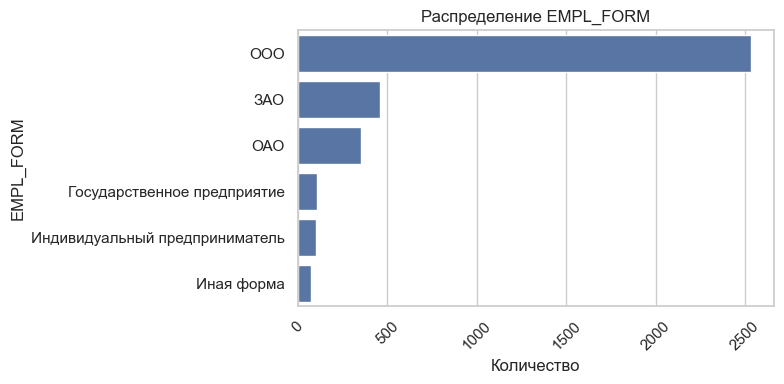

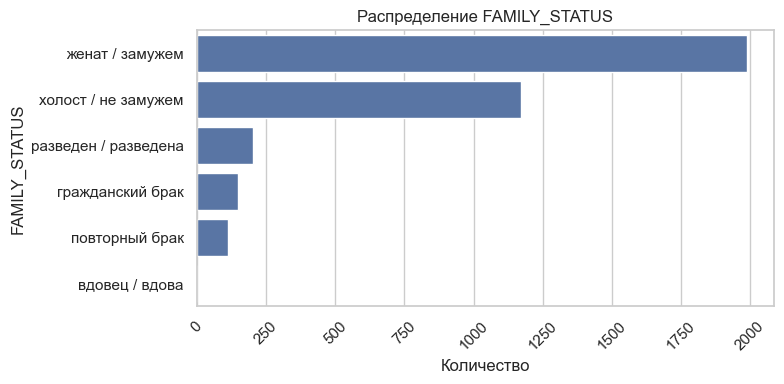

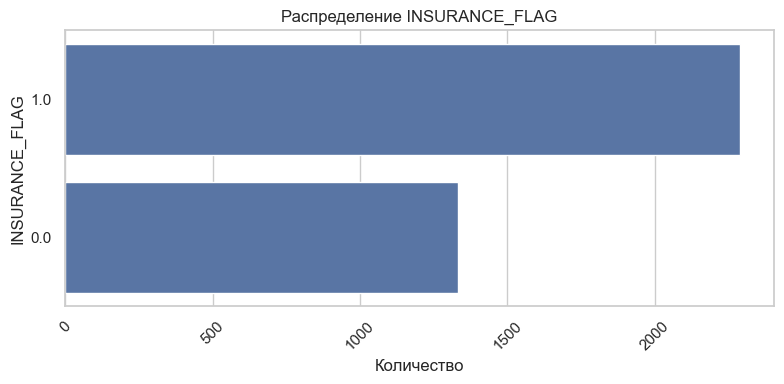

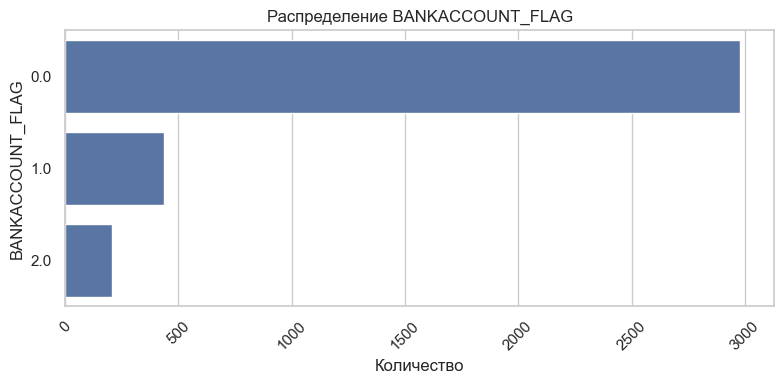

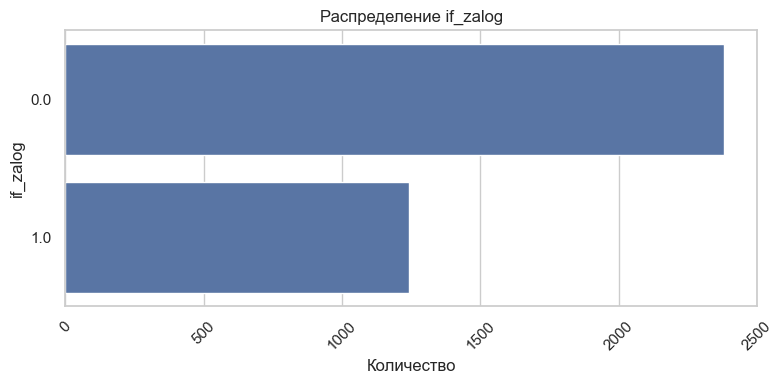

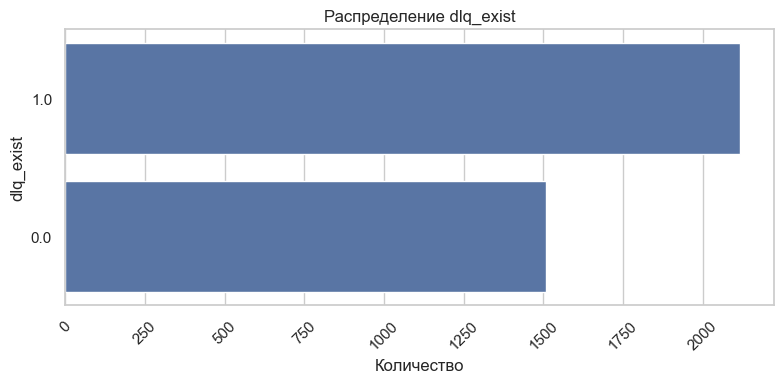

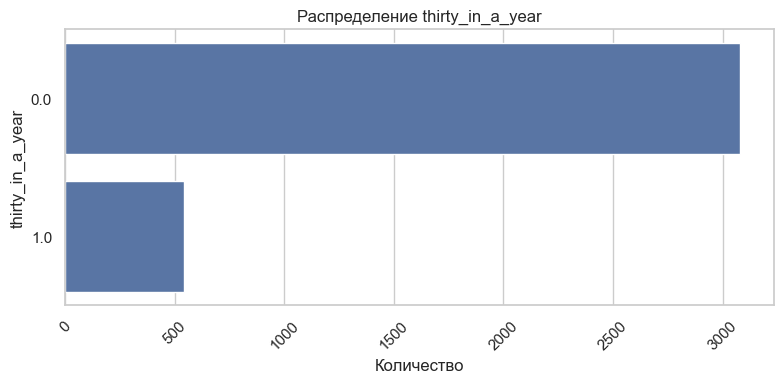

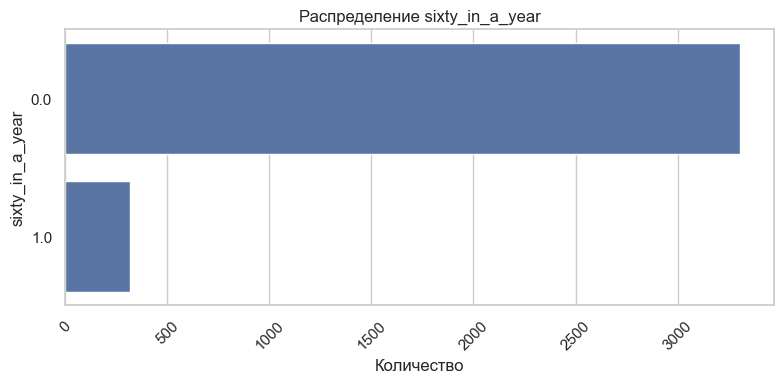

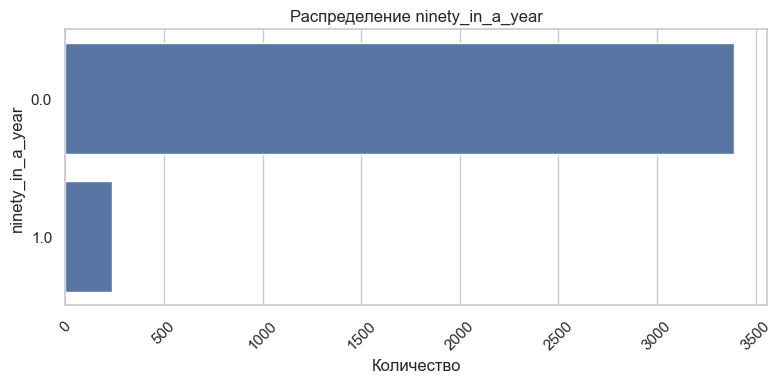

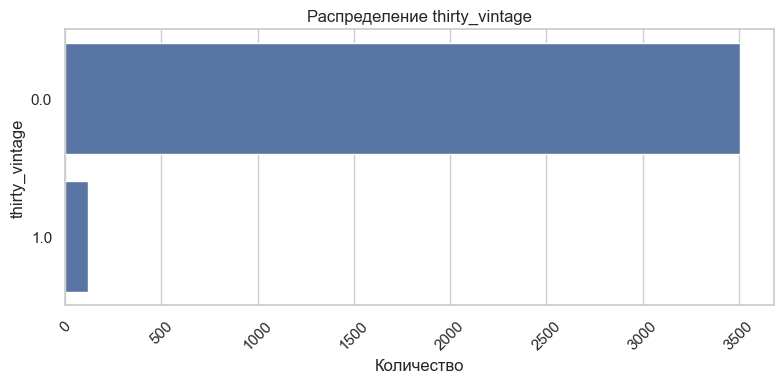

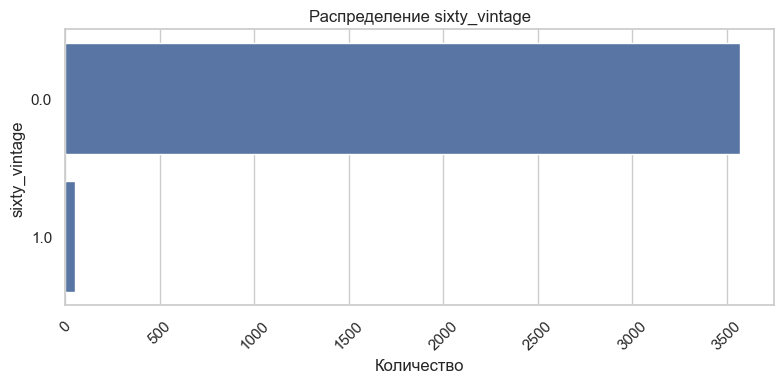

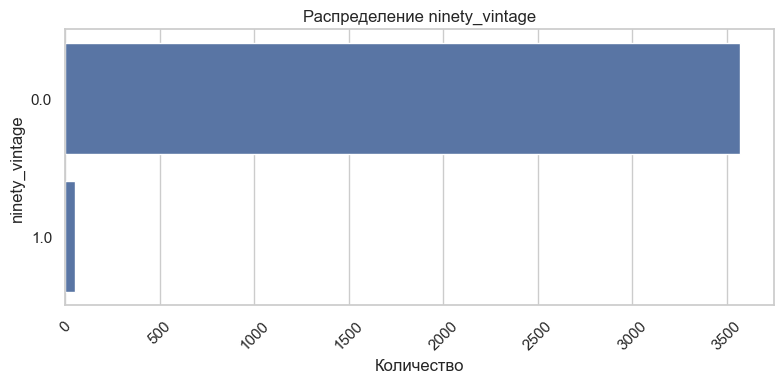

In [29]:
plot_hist_df(df_final)

In [30]:
factor_columns.remove('Номер варианта')
display(df_final.loc[:, factor_columns].mode().T)
display(df_final['age'].mean())

,0
INCOME_BASE_TYPE,Поступление зарплаты на счет
CREDIT_PURPOSE,Ремонт
SEX,мужской
EDUCATION,5
EMPL_TYPE,специалист
EMPL_SIZE,>250
EMPL_PROPERTY,Торговля
EMPL_FORM,ООО
FAMILY_STATUS,женат / замужем
INSURANCE_FLAG,1.0


np.float64(36.07944827586207)

Типичный представитель нашей выборки:
- Женатый мужчина 36 лет
- С высшим образованием
- без иждивенцев или детей или с только что родившимся ребенком
- На должности специалиста
- С зарплатой ">250", поступающей на счёт
- Берущий кредит на ремонт
- Работает в сфере торговли
- Форма работодателя ООО
- Страхующий свой кредит 
- Не имеющий залога

## Сегментация

### K-Means

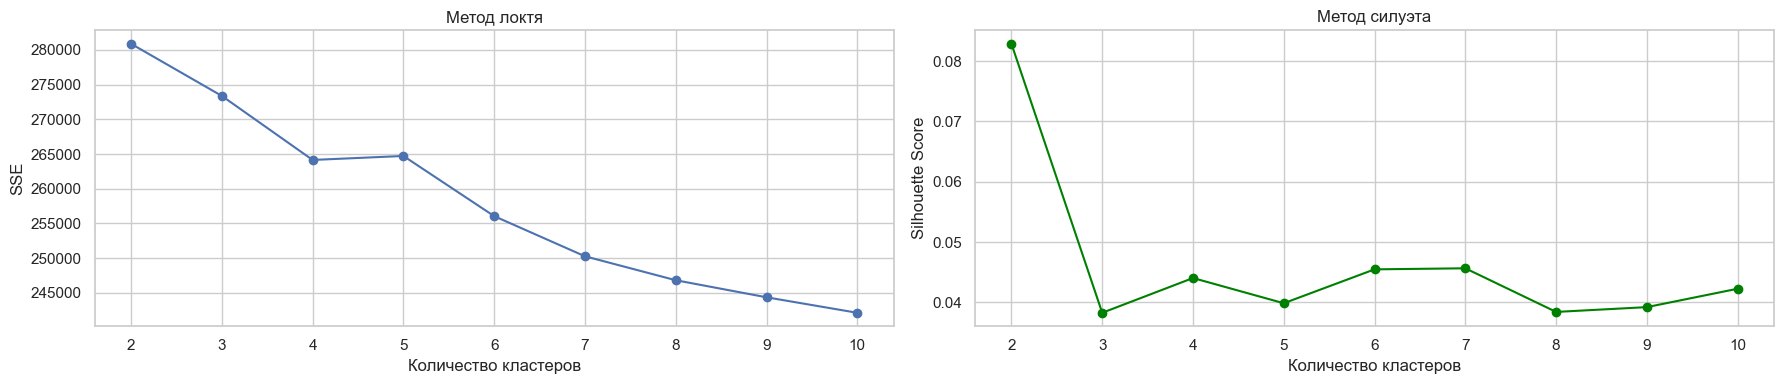

In [31]:
X = df_encoded.copy()

# Стандартизируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K_range = range(2, 11)
sse = []
sil_scores = []
ch_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    
    # Метод локтя (SSE)
    sse.append(km.inertia_)
    
    # Силуэт
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
plt.plot(K_range, sse, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('SSE')
plt.title('Метод локтя')

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Метод силуэта')

plt.tight_layout()
plt.show()


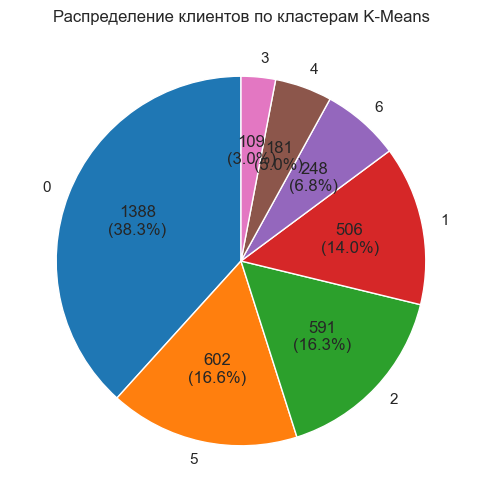

In [32]:
optimal_k = 7
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
X['Segment_KMeans'] = kmeans_final.fit_predict(X_scaled)

cluster_counts = X['Segment_KMeans'].value_counts()

# Функция для отображения числа и процента
def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{absolute}\n({pct:.1f}%)"

plt.figure(figsize=(6,6))
plt.pie(cluster_counts, 
        labels=cluster_counts.index, 
        autopct=lambda pct: func(pct, cluster_counts), 
        startangle=90, 
        colors=plt.cm.tab10.colors)
plt.title('Распределение клиентов по кластерам K-Means')
plt.show()

Добавим полученные сегменты к данных до One-Hot-Encoding

In [33]:
df_final = df_final.merge(
    X[['ID', 'Segment_KMeans']],  # берём только нужное поле X['Segment_KMeans']
    on='ID',
    how='inner'
)

### Обучение с учителем - дерево решений

Предположим, что у нас есть KMeans сегменты как истинные

In [34]:
X = df_encoded.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

metrics_summary = []

for k in range(3, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_all = kmeans.fit_predict(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_all, test_size=0.2, random_state=42, stratify=y_all
    )

    # Дерево решений
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)
    
    # Метрики
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    # ROC-AUC для мультикласса
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    gini = 2 * roc_auc - 1
    
    metrics_summary.append({
        'k': k,
        'Accuracy': acc,
        'F1': f1,
        'ROC-AUC': roc_auc,
        'Gini': gini
    })

metrics_df = pd.DataFrame(metrics_summary)
print(metrics_df)

    k  Accuracy        F1   ROC-AUC      Gini
0   3  0.893793  0.893388  0.909660  0.819321
1   4  0.891034  0.892055  0.916308  0.832616
2   5  0.911724  0.911742  0.940417  0.880834
3   6  0.925517  0.926091  0.948650  0.897300
4   7  0.888276  0.888701  0.925468  0.850936
5   8  0.801379  0.801789  0.894462  0.788924
6   9  0.806897  0.806304  0.884716  0.769432
7  10  0.826207  0.825328  0.907521  0.815041


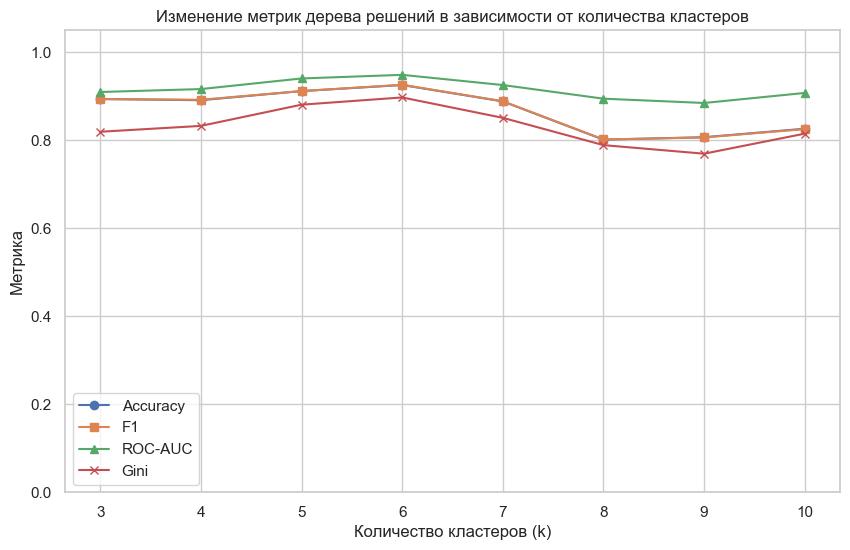

In [35]:
# Данные
k_values = metrics_df['k']

plt.figure(figsize=(10,6))

# Строим линии для каждой метрики
plt.plot(k_values, metrics_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(k_values, metrics_df['F1'], marker='s', label='F1')
plt.plot(k_values, metrics_df['ROC-AUC'], marker='^', label='ROC-AUC')
plt.plot(k_values, metrics_df['Gini'], marker='x', label='Gini')

plt.xlabel('Количество кластеров (k)')
plt.ylabel('Метрика')
plt.title('Изменение метрик дерева решений в зависимости от количества кластеров')
plt.xticks(k_values)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.show()

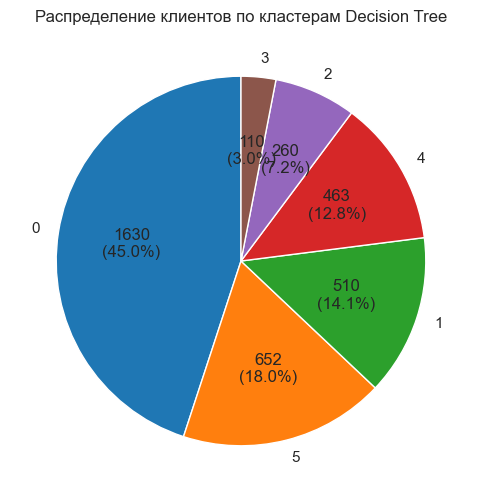

In [36]:
optimal_k = 6

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_all = kmeans.fit_predict(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_all, test_size=0.2, random_state=42, stratify=y_all
)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

X['Segment_DecisionTree'] = clf.predict(X_scaled)
cluster_counts = X['Segment_DecisionTree'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(cluster_counts, 
        labels=cluster_counts.index, 
        autopct=lambda pct: func(pct, cluster_counts), 
        startangle=90, 
        colors=plt.cm.tab10.colors)
plt.title('Распределение клиентов по кластерам Decision Tree')
plt.show()

Добавим полученные сегменты к данных до One-Hot-Encoding

In [37]:
df_final = df_final.merge(
    X[['ID', 'Segment_DecisionTree']],  # берём только нужное поле X['Segment_KMeans']
    on='ID',
    how='inner'
)

## Профили клиентов

Сделаем маски для дальнейшего удобства

In [38]:
segment_cols = ['Segment_KMeans', 'Segment_DecisionTree']
id_cols = ['ID']

numeric_columns = [
    col for col in df_final.columns
    if col not in (
        id_cols
        + segment_cols
        + factor_columns
    )
]

### По 1-ой сегментации

In [39]:
kmeans_numeric_profile = (
    df_final
    .groupby('Segment_KMeans')[numeric_columns]
    .mean()
    .round(3)
    .T
)

kmeans_numeric_profile

Segment_KMeans,0,1,2,3,4,5,6
Active_not_cc,0.677,1.022,2.201,1.009,1.365,0.882,1.173
Active_to_All_prc,0.447,0.421,0.380,0.433,0.494,0.451,0.336
DEPENDANT_NUMBER,0.006,0.002,0.005,0.000,0.000,0.008,0.000
DTI,0.370,0.410,0.439,0.385,0.405,0.368,0.405
FULL_AGE_CHILD_NUMBER,0.449,0.599,0.607,0.514,0.503,0.636,0.488
Period_at_work,52.368,57.603,78.670,41.908,49.602,56.272,51.802
age,34.577,35.425,38.920,31.862,33.862,38.447,36.778
all_credits,3.780,5.028,11.206,5.376,6.403,4.674,7.254
avg_num_delay,0.041,0.040,0.050,0.071,0.060,0.044,0.281
max14days,0.297,0.429,0.384,0.431,3.287,0.296,0.423


In [40]:
kmeans_cat_profile = (
    df_final
    .groupby('Segment_KMeans')[factor_columns]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .T
)

kmeans_cat_profile

Segment_KMeans,0,1,2,3,4,5,6
INCOME_BASE_TYPE,Поступление зарплаты на счет,2НДФЛ,Форма банка (без печати работодателя),Поступление зарплаты на счет,2НДФЛ,Форма банка (без печати работодателя),Поступление зарплаты на счет
CREDIT_PURPOSE,Ремонт,Ремонт,Ремонт,Ремонт,Ремонт,Ремонт,Ремонт
SEX,женский,мужской,женский,мужской,женский,мужской,мужской
EDUCATION,5,5,5,5,5,5,5
EMPL_TYPE,специалист,специалист,специалист,торговый представитель,специалист,менеджер высшего звена,специалист
EMPL_SIZE,>250,>250,>250,>250,>250,< 50,>250
EMPL_PROPERTY,Торговля,Торговля,Торговля,Торговля,Торговля,Торговля,Торговля
EMPL_FORM,ООО,ООО,ООО,ООО,ООО,ООО,ООО
FAMILY_STATUS,женат / замужем,женат / замужем,женат / замужем,женат / замужем,женат / замужем,женат / замужем,женат / замужем
INSURANCE_FLAG,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Сегмент 1 — «Молодые активные заемщики»
Клиенты с умеренным кредитным опытом, достаточно активные, без
выраженных проблем с обслуживанием долга.
Характерные черты:
- Средний возраст: ~34–35 лет
- Небольшое количество иждивенцев
- 3–4 кредита в среднем
- Низкая средняя просрочка, редкие задержки платежей
- DTI на умеренном уровне
- Последний кредит брался относительно недавно

Интерпретация:

Это «рабочая база» банка — клиенты без ярко выраженных рисков и без
экстремально высокой доходности. Подходят для кросс-продаж и стандартных
кредитных предложений.

#### Сегмент 2 — «Кредитно нагруженные, но дисциплинированные»
Более опытные заемщики с заметно большей кредитной историей.

Характерные черты:
- Возраст ~35–36 лет
- 5 и более кредитов
- Более высокая долговая нагрузка
- Просрочки встречаются чаще, но остаются контролируемыми
- Более длительный стаж работы

Интерпретация:

Доходные клиенты, но с уже накопленным риском. Важно не наращивать
нагрузку агрессивно. Подходят для рефинансирования и реструктуризации, а не
для новых крупных кредитов.

#### Сегмент 3 — «Семейные клиенты со стабильной занятостью»
Сегмент с заметной семейной нагрузкой.

- Характерные черты:
- Большее число детей
- Более длительный стаж работы
- Средний возраст выше, чем в сегментах 1–2
- Кредитная активность умеренная
- Просрочки в целом редки

Интерпретация:

Консервативные заемщики. Хорошо реагируют на долгосрочные продукты
(ипотека, страхование, семейные программы).

#### Сегмент 4 — «Риск-чувствительные заемщики»
Клиенты с признаками проблемного поведения.

Характерные черты:
- Повышенные max-показатели просрочек (30–90 дней)
- Более высокий DTI
- Менее стабильная кредитная история

Интерпретация:

Пограничный сегмент. Формально активны, но риск уже материализуется.
Новое кредитование — только при ужесточенных скоринговых правилах.

#### Сегмент 5 — «Пассивные / ушедшие клиенты»
Сегмент с минимальной текущей активностью.

Характерные черты:
- Последний кредит был очень давно
- Малое количество кредитов за всю историю
- Минимальные платежи
- Низкая текущая вовлеченность

Интерпретация:

Фактически потерянные клиенты. Возможны точечные реактивационные
кампании, но массовые инвестиции нецелесообразны.

### По 2-ой сегментации

In [41]:
dt_numeric_profile = (
    df_final
    .groupby('Segment_DecisionTree')[numeric_columns]
    .mean()
    .round(3)
    .T
)

dt_numeric_profile

Segment_DecisionTree,0,1,2,3,4,5
Active_not_cc,0.821,1.069,1.188,1.018,2.073,1.029
Active_to_All_prc,0.431,0.421,0.329,0.440,0.451,0.444
DEPENDANT_NUMBER,0.007,0.000,0.004,0.000,0.000,0.008
DTI,0.376,0.414,0.406,0.384,0.436,0.373
FULL_AGE_CHILD_NUMBER,0.473,0.594,0.481,0.518,0.570,0.638
Period_at_work,57.183,59.376,52.192,41.945,61.661,58.856
age,35.258,35.618,36.665,31.791,36.553,38.647
all_credits,4.613,5.251,7.477,5.336,9.719,5.434
avg_num_delay,0.042,0.039,0.276,0.071,0.054,0.045
max14days,0.283,0.410,0.400,0.473,1.672,0.278


In [42]:
dt_cat_profile = (
    df_final
    .groupby('Segment_DecisionTree')[factor_columns]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .T
)

dt_cat_profile

Segment_DecisionTree,0,1,2,3,4,5
INCOME_BASE_TYPE,Поступление зарплаты на счет,2НДФЛ,Поступление зарплаты на счет,Поступление зарплаты на счет,2НДФЛ,Форма банка (без печати работодателя)
CREDIT_PURPOSE,Ремонт,Ремонт,Ремонт,Ремонт,Ремонт,Ремонт
SEX,мужской,мужской,мужской,мужской,женский,мужской
EDUCATION,5,5,5,5,5,5
EMPL_TYPE,специалист,специалист,специалист,торговый представитель,специалист,менеджер высшего звена
EMPL_SIZE,>250,>250,>250,>250,>250,< 50
EMPL_PROPERTY,Торговля,Торговля,Торговля,Торговля,Торговля,Торговля
EMPL_FORM,ООО,ООО,ООО,ООО,ООО,ООО
FAMILY_STATUS,женат / замужем,женат / замужем,женат / замужем,женат / замужем,женат / замужем,женат / замужем
INSURANCE_FLAG,1.0,1.0,1.0,1.0,1.0,1.0


#### Сегмент 1 — «Низкий риск»
- Низкий DTI
- Минимальные или отсутствующие просрочки
- Кредиты брались недавно

Интерпретация:

Идеальный сегмент для автоматического одобрения.

#### Сегмент 2 — «Средний риск, высокая история»
- Средняя нагрузка
- Хорошая кредитная история
- Умеренный риск

Интерпретация:

Подходят для масштабирования кредитования

#### Сегмент 3 — «Проблемные заемщики»
- Высокая активность
- Более высокий риск
- Просрочки встречаются чаще

Интерпретация:

Аналог KMeans-сегмента 2.

#### Сегмент 4 — «Неактивные»
- Показатели близки к средним
- Низкая дискриминативность


Интерпретация:

Слабая бизнес-ценность сегмента

#### Сегмент 5 — Максимальный DTI (~0.44)
- Высокая просрочка
- Нестабильная история

Интерпретация:

Используется как сегмент отказов.

#### Сегмент 5 — неактивные
- Давний последний кредит
- Низкая активность
- Минимальные платежи

Интерпретация:

Полное совпадение с «потерянными» клиентами из KMeans.

## Итог

По результатам сегментации получили слишком много сегментов как при обучении с учителем, так и без. Большое количество сегментов сделали различия между ними слабо заметными, что говорит о том, что часть сегментов следует "схлопнуть" в силу слабой разницы с другими сегментами, а также ввиду их малого объёма.

Также несмотря на то, что при разных подходах мы получили различное кол-во сегментов, они оказались достаточно похожи между собой, что часть сегментов практически полностью совпала как по количеству значений, так и по характерным показателям